In [1]:
# Reading in the data file and basic EDA.
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv("./../data/data.csv")

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
# Removing any of the null values.

df.isnull().sum()
# last column contains the null values. 

df.shape
#(569, 33)

df = df.iloc[:,0:32]
df.shape

df.head()
df.isnull().sum()
# No missing values.

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [326]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
df['diagnosis'].value_counts()

# Note: There are 145 more benign samples than malignant samples. 
# Must utilize stratified argument when splitting the data.

B    357
M    212
Name: diagnosis, dtype: int64

In [15]:
print("Number of IDs:",df['id'].count())
print("Number of unique IDs:",df['id'].nunique())

# All IDs in the dataset are unique, displaying no group structure. 

Number of IDs: 569
Number of unique IDs: 569


In [328]:
# There are IDs varying in the number of digits inputted, I am going to see if there is any correlation in the datasets.

df['id']

# However, there are IDs that are varying in number of digits. 
# This could potentially mean the patients are coming from the same hospital. 

max_value = 0
min_value = 9

for i in df['id'].index:
    temp = len(str(df['id'].iloc[i]))
    if max_value < temp:
        max_value = temp

print("Max character Value:",max_value)
# 9

for i in df['id'].index:
    temp = len(str(df['id'].iloc[i]))
    if min_value > temp:
        min_value = temp

print("Min character Value:",min_value)
# 4

df['id'].isnull().value_counts()

Max character Value: 9
Min character Value: 4


False    569
Name: id, dtype: int64

In [329]:
# Since the Minimum of id digits is 4 and the max is 9, I am going to construct lists for every ID digit count.

id_digit_4 = [] 
id_digit_5 = []
id_digit_6 = []
id_digit_7 = []
id_digit_8 = []
id_digit_9 = []

for i in df['id'].index:
    temp = len(str(df['id'].iloc[i]))
    if temp == 4:
        id_digit_4.append(df['id'].iloc[i])
    elif temp == 5:
        id_digit_5.append(df['id'].iloc[i])
    elif temp == 6:
        id_digit_6.append(df['id'].iloc[i])
    elif temp == 7:
        id_digit_7.append(df['id'].iloc[i])
    elif temp == 8:
        id_digit_8.append(df['id'].iloc[i])
    elif temp == 9:
        id_digit_9.append(df['id'].iloc[i])

print("IDs with 4 digits:",len(id_digit_4))
print("IDs with 5 digits:",len(id_digit_5))
print("Ids with 6 digits:",len(id_digit_6))
print("IDs with 7 digits:",len(id_digit_7))
print("IDs with 8 digits:",len(id_digit_8))
print("IDs with 9 digits:",len(id_digit_9))

IDs with 4 digits: 4
IDs with 5 digits: 37
Ids with 6 digits: 344
IDs with 7 digits: 103
IDs with 8 digits: 70
IDs with 9 digits: 11


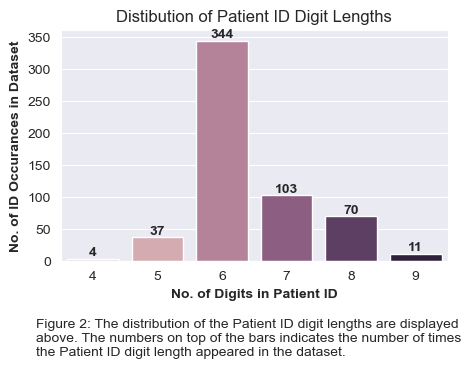

In [350]:
# Plotting the unique ID counts

data = {'ID Digit Number':[4,5,6,7,8,9],'Digit Length Count':[4,37,344,103,70,11],'Portion of Dataset':[0.7,6.5,60.4,18.1,12.3,1.9]}
df_digit_count = pd.DataFrame(data)
df_digit_count

text_caption = 'Figure 2: The distribution of the Patient ID digit lengths are displayed\n\
above. The numbers on top of the bars indicates the number of times\n\
the Patient ID digit length appeared in the dataset.'

plt.figure(figsize=(5,3)).text(0.075,-0.2,text_caption,horizontalalignment = 'left',wrap=True)
plot = sb.barplot(
    data=df_digit_count,
    x="ID Digit Number",
    y='Digit Length Count',
    palette=sb.cubehelix_palette(reverse=False)
)
plot.bar_label(plot.containers[0],weight=1000)
plot.set_xlabel('No. of Digits in Patient ID',weight=1000)
plot.set_ylabel('No. of ID Occurances in Dataset',weight=1000)
plot.set_title('Distibution of Patient ID Digit Lengths')
plt.savefig('./../figures/distribution_patient_ID_digit_lengths.png',dpi=400,bbox_inches='tight')
plt.show()

In [354]:
# Adding another column containing the ID character count.

# df = df.drop(columns=['id_digit_count'])
df.insert(1,'id_digit_count',np.nan)
df.head()

for i in df.index:
    temp = df.loc[i,'id']
    if temp in id_digit_4:
        df.loc[i,'id_digit_count'] = 4
    elif temp in id_digit_5:
        df.loc[i,'id_digit_count'] = 5
    elif temp in id_digit_6:
        df.loc[i,'id_digit_count'] = 6
    elif temp in id_digit_7:
        df.loc[i,'id_digit_count'] = 7
    elif temp in id_digit_8:
        df.loc[i,'id_digit_count'] = 8
    elif temp in id_digit_9:
        df.loc[i,'id_digit_count'] = 9

df.head()
# df['id_digit_count'].isnull().value_counts()
# Sanity Check
# False    569

,id,id_digit_count,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,6.0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,6.0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,8.0,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,8.0,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,8.0,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


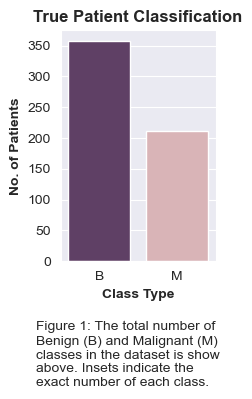

In [349]:
# The number of patients with Beneign and Malignant tumors 
diagnosis_classes = df.diagnosis.value_counts() 
diagnosis_classes = pd.DataFrame(diagnosis_classes)
diagnosis_classes = diagnosis_classes.transpose()

figure_caption = 'Figure 1: The total number of \n\
Benign (B) and Malignant (M) \n\
classes in the dataset is show\n\
above. Insets indicate the \n\
exact number of each class.'

plt.figure(figsize=(2,3)).text(0,-0.3,figure_caption,horizontalalignment = 'left',wrap=True)
sample_cmap = sb.cubehelix_palette(reverse=False,light=0.3,dark=2.5)
sb.set_style(style='darkgrid')
sb_plot = sb.barplot(
    data = diagnosis_classes,
    palette= sample_cmap
)
sb_plot.set_xlabel("Class Type",weight=1000)
sb_plot.set_ylabel("No. of Patients",weight=1000)
sb_plot.set_title("True Patient Classification",weight=1000)
plt.savefig('./../figures/class_types_in_dataset.png',dpi=400,bbox_inches='tight')
plt.show()

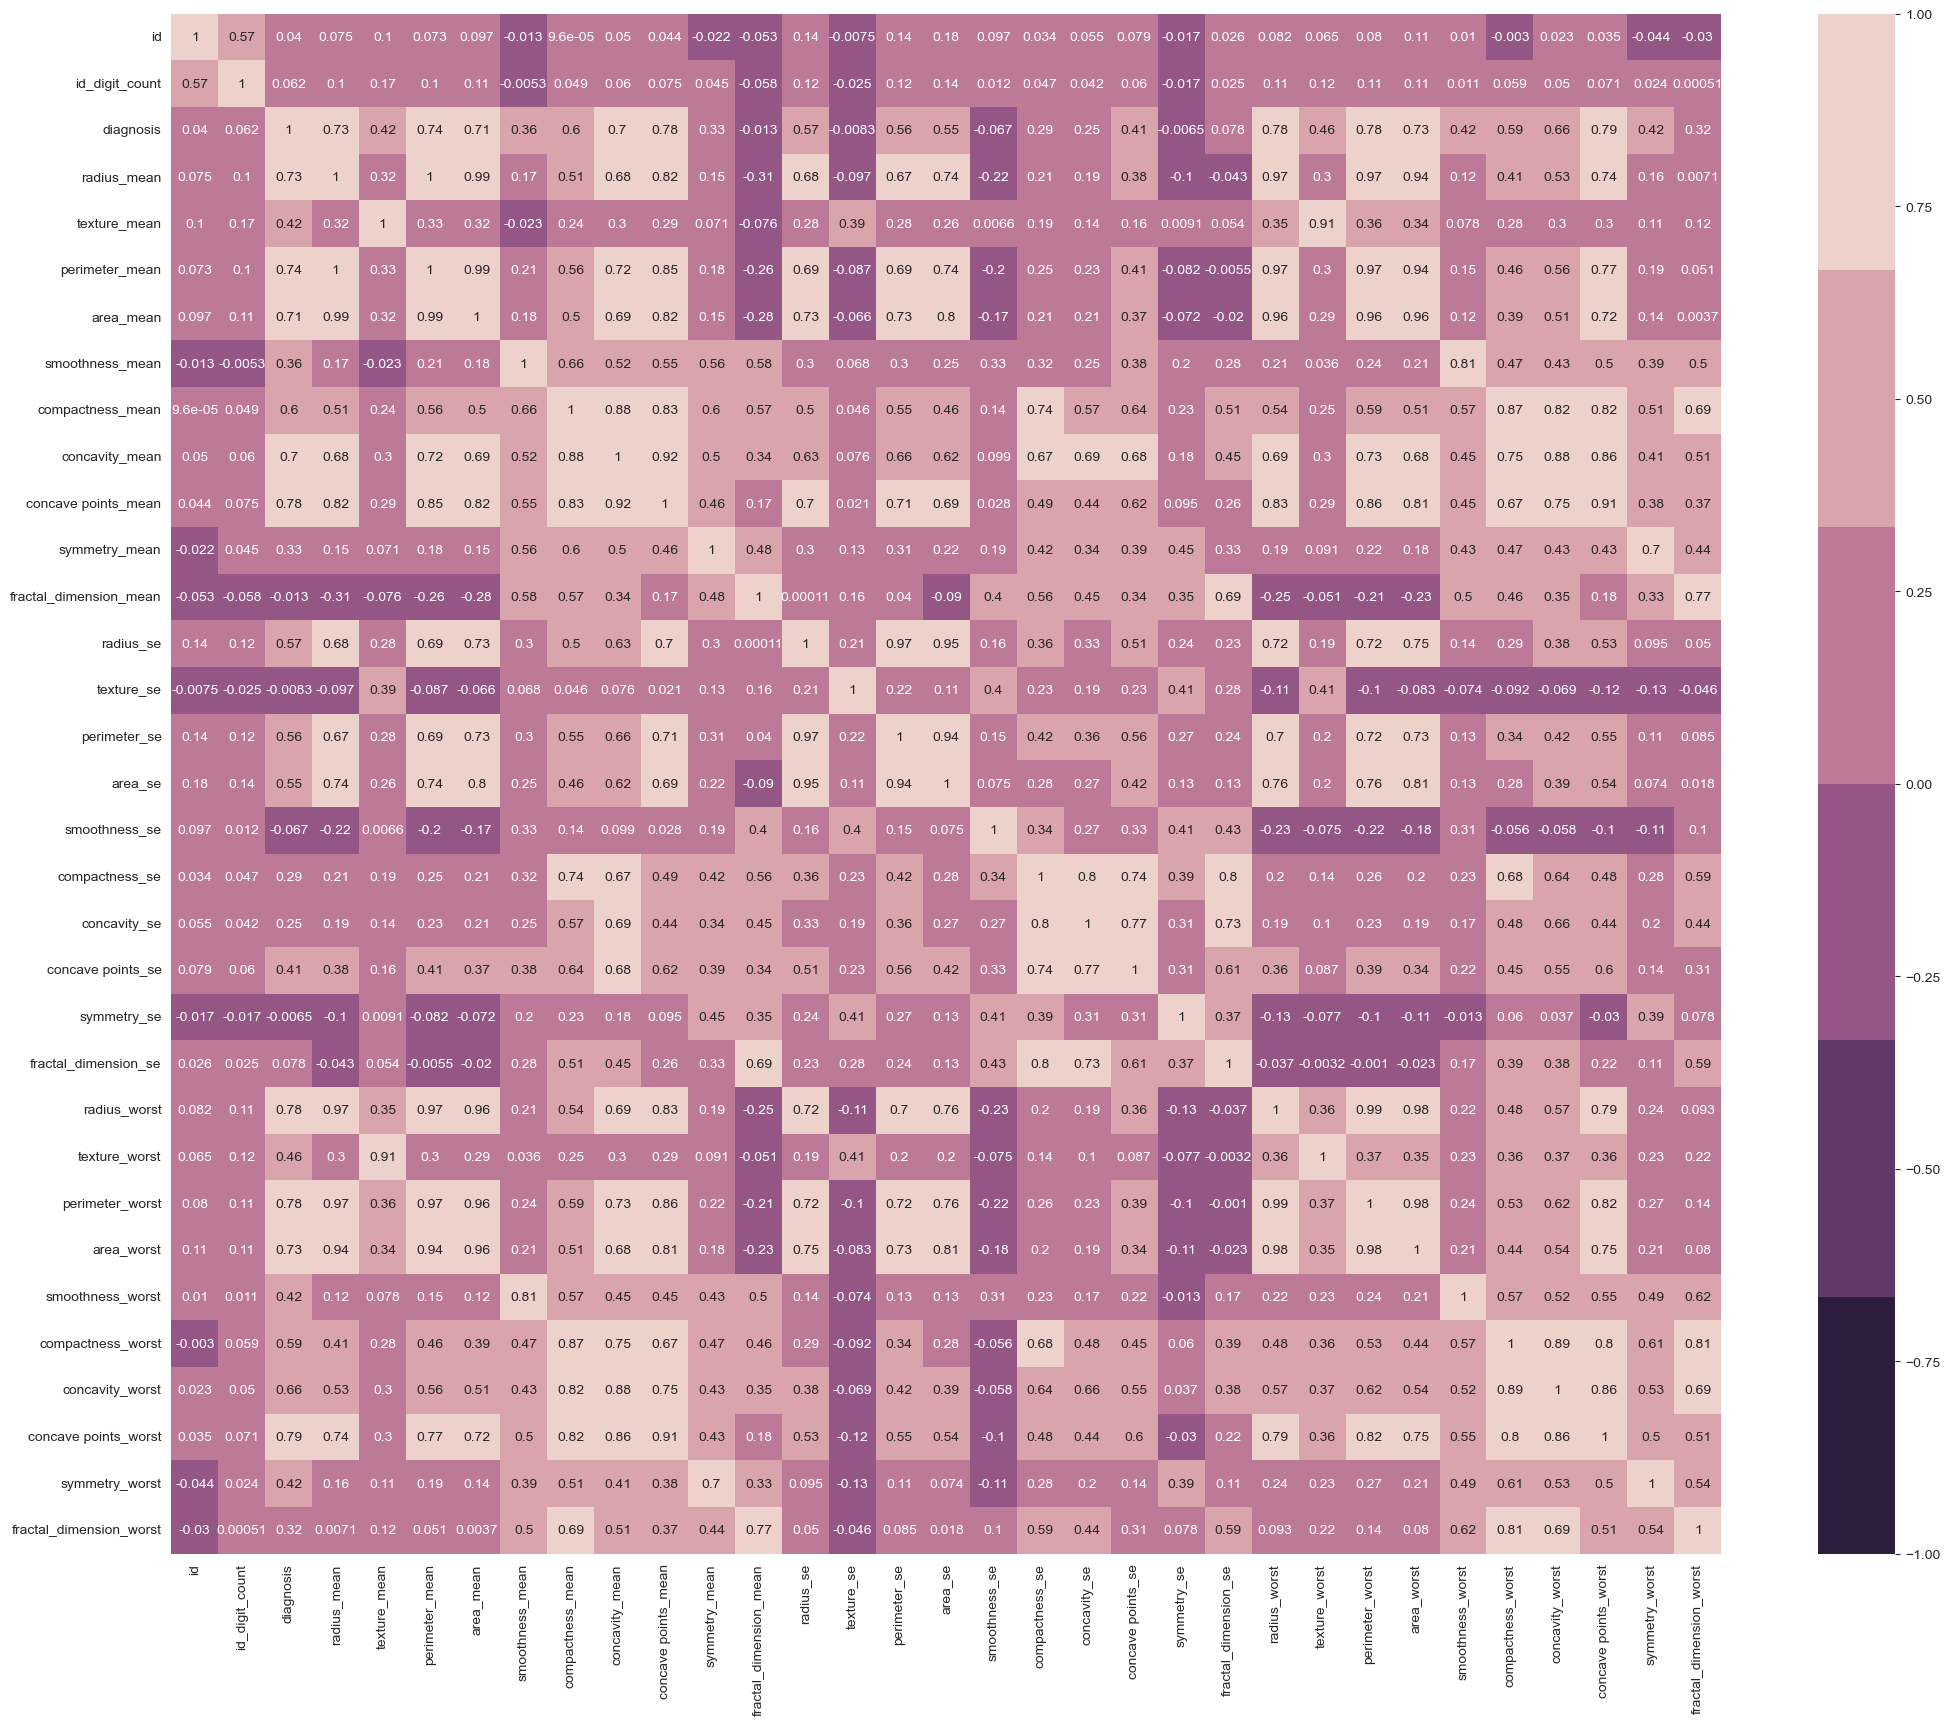

In [332]:
# Full Pearson Correlation Heatmap

df_diagnosis = df['diagnosis']
df_diagnosis.replace('B',0,inplace=True)
df_diagnosis.replace('M',1,inplace=True)

df_mean = df.iloc[:,1:13]
# df_mean.insert(0,'diagnosis',df_diagnosis)

df_se = df.iloc[:,12:22]
# df_se.insert(0,'diagnosis',df_diagnosis)

df_worst = df.iloc[:,22:32]
# df_worst.insert(0,'diagnosis',df_diagnosis)

df_corr = df.corr('pearson') # Correlation plot of all of the features together. 
df_mean_corr = df_mean.corr('pearson') # Correlation plot for 10 key features at a time.
df_se_corr = df_se.corr('pearson') # Correlation plot for 10 key features at a time.
df_worst_corr = df_worst.corr('pearson') # Correlation plot for 10 key features at a time.

plt.figure(figsize=(25,20))
sample_cmap = sb.cubehelix_palette(reverse=True)
sb.heatmap(df_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap)
# sb.heatmap(df_se_corr,annot=True,vmin=-1,vmax=1)
# sb.heatmap(df_worst_corr,annot=True,vmin=-1,vmax=1)
plt.show()

# The main idea was to see the correlation of the id_digit_count feature with the rest of the features.

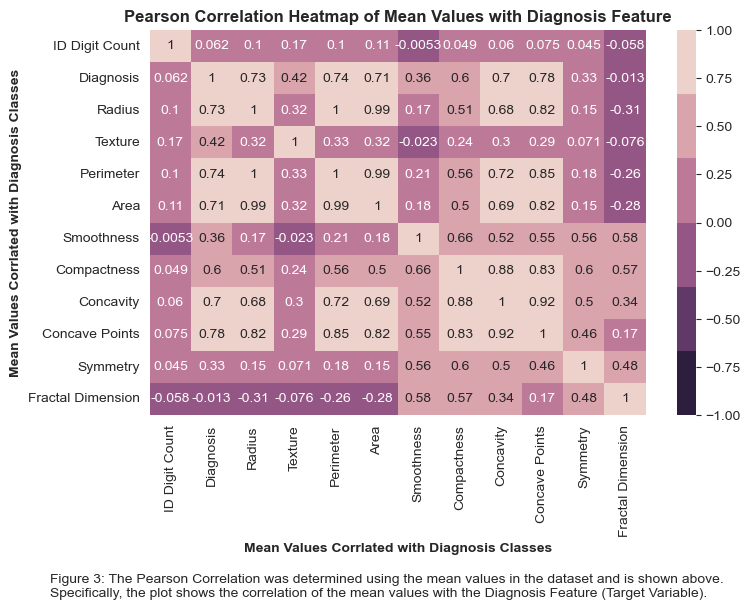

In [355]:
# Below are correlation heatmap, separated by Mean, SE, and worst values
# to observe difference easier. 

##### Preparing dfs for pearson correlation
df_diagnosis = df['diagnosis']
df_diagnosis.replace('B',0,inplace=True)
df_diagnosis.replace('M',1,inplace=True)

df_mean = df.iloc[:,1:13]
# df_mean.insert(0,'diagnosis',df_diagnosis)

df_se = df.iloc[:,12:22]
# df_se.insert(0,'diagnosis',df_diagnosis)

df_worst = df.iloc[:,22:32]
# df_worst.insert(0,'diagnosis',df_diagnosis)

df_corr = df.corr('pearson') # Correlation plot of all of the features together. 
df_mean_corr = df_mean.corr('pearson') # Correlation plot for 10 key features at a time.
df_se_corr = df_se.corr('pearson') # Correlation plot for 10 key features at a time.
df_worst_corr = df_worst.corr('pearson') # Correlation plot for 10 key features at a time.

##### Plotting the Heatmap 
figure_caption = 'Figure 3: The Pearson Correlation was determined using the mean values in the dataset and is shown above.\n\
Specifically, the plot shows the correlation of the mean values with the Diagnosis Feature (Target Variable).'

plt.figure(figsize=(8,5)).text(0,-0.25,figure_caption,horizontalalignment = 'left',wrap=True)

sample_cmap = sb.cubehelix_palette(reverse=True)
plot = sb.heatmap(df_mean_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap)
plot.set_title('Pearson Correlation Heatmap of Mean Values with Diagnosis Feature',weight=1000)
plot.set_ylabel('Mean Values Corrlated with Diagnosis Classes',weight=1000)
plot.set_xlabel('Mean Values Corrlated with Diagnosis Classes',weight=1000)
plot.set_yticklabels(['ID Digit Count','Diagnosis','Radius','Texture','Perimeter','Area','Smoothness','Compactness','Concavity','Concave Points','Symmetry','Fractal Dimension'])
plot.set_xticklabels(['ID Digit Count','Diagnosis','Radius','Texture','Perimeter','Area','Smoothness','Compactness','Concavity','Concave Points','Symmetry','Fractal Dimension'])

plt.savefig('./../figures/corr_heatmap_mean_values_wDiagnosis_feature.png',dpi=400,bbox_inches='tight')
plt.show()

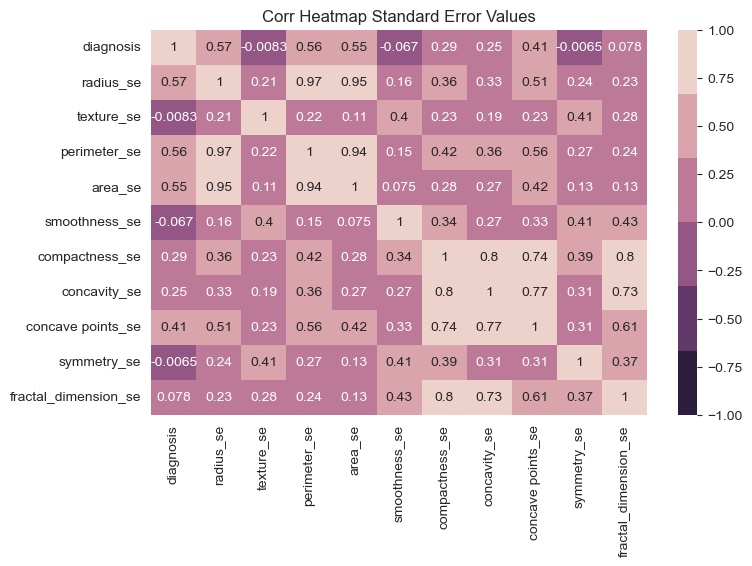

In [259]:
# Below are correlation heatmap, separated by Mean, SE, and worst values
# to observe difference easier. 

df_diagnosis = df['diagnosis']
df_diagnosis.replace('B',0,inplace=True)
df_diagnosis.replace('M',1,inplace=True)

df_mean = df.iloc[:,1:13]
# df_mean.insert(0,'diagnosis',df_diagnosis)

df_se = df.iloc[:,12:22]
# df_se.insert(0,'diagnosis',df_diagnosis)

df_worst = df.iloc[:,22:32]
# df_worst.insert(0,'diagnosis',df_diagnosis)

df_corr = df.corr('pearson') # Correlation plot of all of the features together. 
df_mean_corr = df_mean.corr('pearson') # Correlation plot for 10 key features at a time.
df_se_corr = df_se.corr('pearson') # Correlation plot for 10 key features at a time.
df_worst_corr = df_worst.corr('pearson') # Correlation plot for 10 key features at a time.

plt.figure(figsize=(8,5))
sample_cmap = sb.cubehelix_palette(reverse=True)
# sb.heatmap(df_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap)
# sb.heatmap(df_mean_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap).set_title('Corr Heatmap Mean Values')
sb.heatmap(df_se_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap).set_title("Corr Heatmap Standard Error Values")
# sb.heatmap(df_worst_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap)
plt.show()

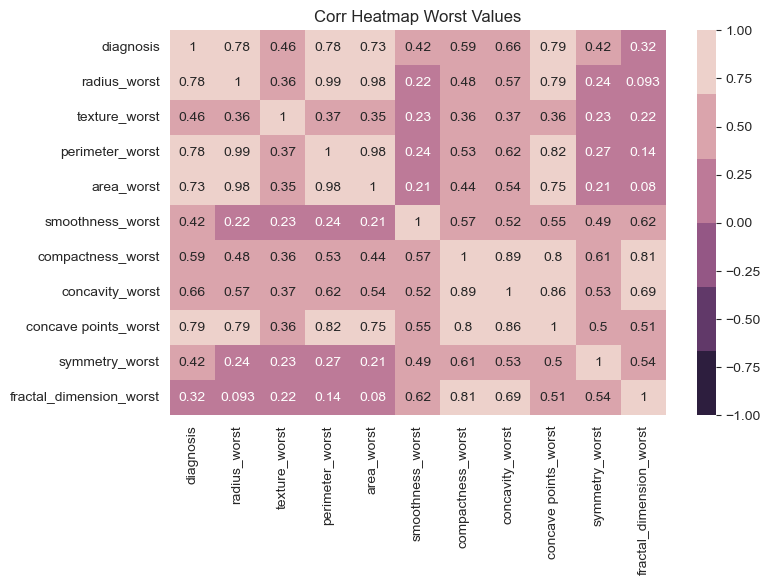

In [260]:
# Below are correlation heatmap, separated by Mean, SE, and worst values
# to observe difference easier. 

df_diagnosis = df['diagnosis']
df_diagnosis.replace('B',0,inplace=True)
df_diagnosis.replace('M',1,inplace=True)

df_mean = df.iloc[:,1:13]
# df_mean.insert(0,'diagnosis',df_diagnosis)

df_se = df.iloc[:,12:22]
# df_se.insert(0,'diagnosis',df_diagnosis)

df_worst = df.iloc[:,22:32]
# df_worst.insert(0,'diagnosis',df_diagnosis)

df_corr = df.corr('pearson') # Correlation plot of all of the features together. 
df_mean_corr = df_mean.corr('pearson') # Correlation plot for 10 key features at a time.
df_se_corr = df_se.corr('pearson') # Correlation plot for 10 key features at a time.
df_worst_corr = df_worst.corr('pearson') # Correlation plot for 10 key features at a time.

plt.figure(figsize=(8,5))
sample_cmap = sb.cubehelix_palette(reverse=True)
# sb.heatmap(df_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap)
# sb.heatmap(df_mean_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap).set_title('Corr Heatmap Mean Values')
# sb.heatmap(df_se_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap).set_title("Corr Heatmap Standard Error Values")
sb.heatmap(df_worst_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap).set_title("Corr Heatmap Worst Values")
plt.show()

/var/folders/4l/5n9f3bws5kqbpycb404wch7r0000gn/T/ipykernel_93214/2127392647.py:13: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  plot = sb.histplot(df, x="radius_mean", hue="diagnosis", element="step",bins=int(bins),palette=sample_cmap)


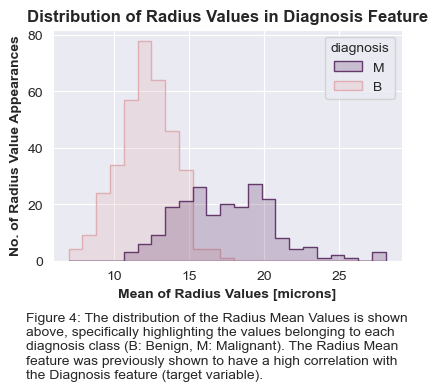

In [351]:
# Histogram plot of the Malignant and the beneign patients using radius mean value.

bins = np.sqrt(len(df_mean['radius_mean']))
figure_caption = 'Figure 4: The distribution of the Radius Mean Values is shown\n\
above, specifically highlighting the values belonging to each\n\
diagnosis class (B: Benign, M: Malignant). The Radius Mean \n\
feature was previously shown to have a high correlation with \n\
the Diagnosis feature (target variable).'

plt.figure(figsize=(4.5,3)).text(0.065,-0.275,figure_caption,horizontalalignment = 'left',wrap=True)

sample_cmap = sb.cubehelix_palette(reverse=False,light=0.3,dark=2.5)
plot = sb.histplot(df, x="radius_mean", hue="diagnosis", element="step",bins=int(bins),palette=sample_cmap)
plot.set_xlabel("Mean of Radius Values [microns]",weight=1000)
plot.set_ylabel("No. of Radius Value Appearances",weight=1000)
plot.set_title('Distribution of Radius Values in Diagnosis Feature',weight=1000)
plt.savefig("./../figures/distribution_radius_values_wIn_diagnosis_classes.png",bbox_inches="tight",dpi=400)
plt.show()


/var/folders/4l/5n9f3bws5kqbpycb404wch7r0000gn/T/ipykernel_93214/4145461213.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  plot = sb.histplot(df, x="fractal_dimension_mean", hue="diagnosis", element="step",bins=int(bins),palette=sample_cmap)


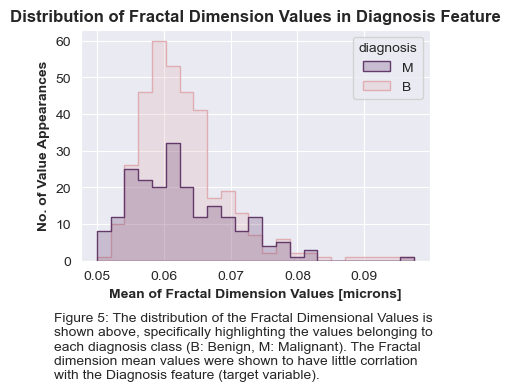

In [352]:
# Histogram plot of the Malignant and the beneign patients using radius mean value.

bins = np.sqrt(len(df['fractal_dimension_mean']))

figure_caption = 'Figure 5: The distribution of the Fractal Dimensional Values is\n\
shown above, specifically highlighting the values belonging to\n\
each diagnosis class (B: Benign, M: Malignant). The Fractal \n\
dimension mean values were shown to have little corrlation \n\
with the Diagnosis feature (target variable).'

plt.figure(figsize=(4.5,3)).text(0.065,-0.275,figure_caption,horizontalalignment = 'left',wrap=True)

sample_cmap = sb.cubehelix_palette(reverse=False,light=0.3,dark=2.5)
plot = sb.histplot(df, x="fractal_dimension_mean", hue="diagnosis", element="step",bins=int(bins),palette=sample_cmap)
plot.set_xlabel("Mean of Fractal Dimension Values [microns]",weight=1000)
plot.set_ylabel("No. of Value Appearances",weight=1000)
plot.set_title('Distribution of Fractal Dimension Values in Diagnosis Feature',weight=1000)
plt.savefig("./../figures/distribution_fractal_dim_values_wIn_diagnosis_classes.png",bbox_inches="tight",dpi=400)
plt.show()


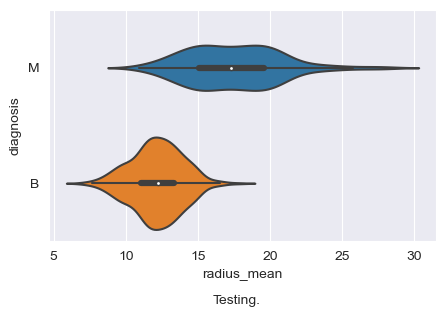

In [163]:
plt.figure(figsize=(5,3)).text(0.5,-0.1,"Testing.",horizontalalignment = 'center',wrap=True)
sb.violinplot(
    data = df,
    x = 'radius_mean',
    y = 'diagnosis'
)
plt.show()

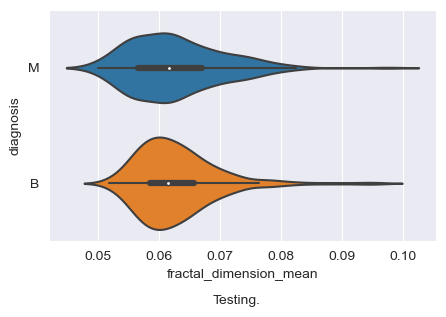

In [165]:
plt.figure(figsize=(5,3)).text(0.5,-0.1,"Testing.",horizontalalignment = 'center',wrap=True)
sb.violinplot(
    data = df,
    x = 'fractal_dimension_mean',
    y = 'diagnosis'
)
plt.show()

# Building ML Model

In [147]:
import pandas as pd

# Re-read in the dataset for sanity checks.
df = pd.read_csv("./../data/data.csv")
df['diagnosis'] = df['diagnosis'].replace('B',0)
df['diagnosis'] = df['diagnosis'].replace('M',1)

### Function that uses accuracy in cross validation

In [141]:
# MLpipe_TrainTestSplit_ACC Function
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
import pandas as pd
import numpy as np 

def customScorerRECALL(y_true,y_pred):
    """
    Input: 
    1. True Target Variable Outcomes.
    2. Predicted Target Variable.

    Return:
    1. Recall.
    """ 
    recall = recall_score(y_true,y_pred,pos_label='M')
    return recall

def MLpipe_StratifiedKFold_ACC(feature_matrix,target_variable,preprocessor,ml_algo,param_grid):
    """
    Input:
    1. Unprocessed feature matrix ; feature_matrix
    2. Target Variable ; target_variable
    3. A preprocessor (ColumnTransformer) ; preprocessor
    4. An intialized ML Algoritm ; ml_algo
    5. Parameter grid as inputs ; param_grid

    Goals: 
    • Split data to other and test (80:20) then use KFolds with 4 folds.
    • Preprocess the data.
    • Perform Cross Validation (GridSearchCV)
    • Calculate the test score. (RMSE)
    • Repeat 10 times for 10 different random states.
    """

    X = feature_matrix
    y = target_variable

    best_models = []
    best_model_scores_acc = []
    best_model_scores_rec = []
    best_model_scores_pre = []

    y_test_sets = []
    y_pred_sets = []
    X_test_sets = []

    # Looping through 10 random states to find the best ML model.
    for i in list(range(1,11)):

        # 80:20 split 
        X_other,X_test,y_other,y_test = train_test_split(X,y,stratify=y,train_size=0.8,shuffle=True,random_state=22*i)

        # 4 splits using KFold
        kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=22*i)

        # Initializing make pipeline with preprocessor and intialized ML algorithm
        pipe = make_pipeline(preprocessor,ml_algo)
        
        # Constructing custom scores for GridSearchCV
        recall_scorer = make_scorer(customScorerRECALL, greater_is_better=True)

        # GridSearchCV loops through all parameter combinations and collects the results 
        # note: custom scorer set under the scoring parameter. 
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring='accuracy',
                            cv=kf, return_train_score = True, n_jobs=6, verbose=True)
        
        # The ML algorithm is fit to 80% of the diabetes dataset.
        grid.fit(X_other, y_other)

        # Used to inspect results.   
        results = grid.cv_results_

        # Storing the best model
        best_estimator = grid.best_estimator_
        
        # Storing the best hyper parameters
        best_param = grid.best_params_
        
        # Storing the best RMSE score
        best_val_score = grid.best_score_ 

        # Saving best model
        best_models.append(best_estimator)

        # Saving best model score
        y_test_pred = best_models[-1].predict(X_test)
        
        best_model_score_acc = accuracy_score(y_test,y_test_pred)
        best_model_score_rec = recall_score(y_test,y_test_pred,pos_label='M')
        best_model_score_pre = precision_score(y_test,y_test_pred,pos_label='M')

        best_model_scores_acc.append(best_model_score_acc)
        best_model_scores_rec.append(best_model_score_rec)
        best_model_scores_pre.append(best_model_score_pre)
        
        X_test_sets.append(X_test)
        y_test_sets.append(y_test)
        y_pred_sets.append(y_test_pred)


    return best_models,best_model_scores_acc,best_model_scores_rec,best_model_scores_pre,X_test_sets,y_test_sets,y_pred_sets

### Function that uses recall in cross validation

In [143]:
# MLpipe_TrainTestSplit_REC Function
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
import pandas as pd
import numpy as np 

def customScorerRECALL(y_true,y_pred):
    """
    Input: 
    1. True Target Variable Outcomes.
    2. Predicted Target Variable.

    Return:
    1. Recall.
    """ 
    recall = recall_score(y_true,y_pred)
    return recall

def MLpipe_StratifiedKFold_REC(feature_matrix,target_variable,preprocessor,ml_algo,param_grid):
    """
    Input:
    1. Unprocessed feature matrix ; feature_matrix
    2. Target Variable ; target_variable
    3. A preprocessor (ColumnTransformer) ; preprocessor
    4. An intialized ML Algoritm ; ml_algo
    5. Parameter grid as inputs ; param_grid

    Goals: 
    • Split data to other and test (80:20) then use KFolds with 4 folds.
    • Preprocess the data.
    • Perform Cross Validation (GridSearchCV)
    • Calculate the test score. (RMSE)
    • Repeat 10 times for 10 different random states.
    
    """

    X = feature_matrix
    y = target_variable

    best_models = []
    best_model_scores_acc = []
    best_model_scores_rec = []
    best_model_scores_pre = []

    y_other_sets = []
    y_test_sets = []
    y_pred_sets = []
    X_test_sets = []
    X_other_sets = []
    
    # Looping through 10 random states to find the best ML model.
    for i in list(range(1,11)):

        # 80:20 split 
        X_other,X_test,y_other,y_test = train_test_split(X,y,stratify=y,train_size=0.8,shuffle=True,random_state=22*i)

        # 4 splits using KFold
        kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=22*i)

        # Initializing make pipeline with preprocessor and intialized ML algorithm
        pipe = make_pipeline(preprocessor,ml_algo)
        
        # Constructing custom scores for GridSearchCV
        recall_scorer = make_scorer(customScorerRECALL, greater_is_better=True)

        # GridSearchCV loops through all parameter combinations and collects the results 
        # note: custom scorer set under the scoring parameter. 
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring=recall_scorer,
                            cv=kf, return_train_score = True, n_jobs=6, verbose=True)
        
        # The ML algorithm is fit to 80% of the diabetes dataset.
        grid.fit(X_other, y_other)

        # Used to inspect results.   
        results = grid.cv_results_

        # Storing the best model
        best_estimator = grid.best_estimator_
        
        # Storing the best hyper parameters
        best_param = grid.best_params_
        
        # Storing the best RMSE score
        best_val_score = grid.best_score_ 

        # Saving best model
        best_models.append(grid)

        # Saving best model score
        y_test_pred = best_models[-1].predict(X_test)
        
        best_model_score_acc = accuracy_score(y_test,y_test_pred)
        best_model_score_rec = recall_score(y_test,y_test_pred)
        best_model_score_pre = precision_score(y_test,y_test_pred)

        best_model_scores_acc.append(best_model_score_acc)
        best_model_scores_rec.append(best_model_score_rec)
        best_model_scores_pre.append(best_model_score_pre)

        X_test_sets.append(X_test)
        X_other_sets.append(X_other)
        y_test_sets.append(y_test)
        y_other_sets.append(y_other)
        y_pred_sets.append(y_test_pred)

    return best_models,best_model_scores_acc,best_model_scores_rec,\
        best_model_scores_pre,X_test_sets,X_other_sets,y_test_sets,\
        y_other_sets,y_pred_sets

In [4]:
# Reading in data as sanity check.
df = pd.read_csv("./../data/data.csv")
df['diagnosis'] = df['diagnosis'].replace('B',0)
df['diagnosis'] = df['diagnosis'].replace('M',1)
X = df.drop(columns=["diagnosis",'id','Unnamed: 32'])
y = df['diagnosis']

### Using Accuracy as Evulation Metric in GridSearchCV

In [8]:
# Logistic Regression - L1 (USING ACCURACY IN GRIDSEARCHCV)
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Preprocessor input
std_ftrs = X.columns.tolist() # all variables are continuous

preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)])

# Intialized ML Algorithm input
log_reg = LogisticRegression(max_iter=10000000)

# Params grid input
param_grid = {'logisticregression__C':np.logspace(-3,3,20),'logisticregression__penalty':['l1'],'logisticregression__solver':['saga']}

# Retrieving best models and best model scores.
L1_CVacc_best_models,\
L1_CVacc_best_model_scores_acc,\
L1_CVacc_best_model_scores_rec,\
L1_CVacc_best_model_scores_pre,\
L1_CVacc_X_test_sets,\
L1_CVacc_y_test_sets,\
L1_CVacc_y_pred_sets = MLpipe_StratifiedKFold_ACC(X,y,preprocessor,log_reg,param_grid)

print("")
print("ACCURACY:")
print("Mean of test scores:","{:.4f}".format(np.mean(L1_CVacc_best_model_scores_acc)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(L1_CVacc_best_model_scores_acc)),'\n')

print("RECALL:")
print("Mean of test scores:","{:.4f}".format(np.mean(L1_CVacc_best_model_scores_rec)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(L1_CVacc_best_model_scores_rec)),'\n')

print("PRECISION:")
print("Mean of test scores:","{:.4f}".format(np.mean(L1_CVacc_best_model_scores_pre)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(L1_CVacc_best_model_scores_pre)))

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits

ACCURACY:
Mean of test scores: 0.9763
Std. Deviation of test scores: 0.0136 

RECALL:
Mean of test scores: 0.9571
Std. Deviation of test scores: 0.0316 

PRECISION:
Mean of test scores: 0.9785
Std. Deviation of test scores: 0.0195


In [221]:
# Logistic Regression - L2 (USING ACCURACY IN GRIDSEARCHCV)

from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Preprocessor input
std_ftrs = X.columns.tolist() # all variables are continuous

preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)])

# Intialized ML Algorithm input
log_reg = LogisticRegression(max_iter=10000000)

# Params grid input
param_grid = {'logisticregression__C':np.logspace(-3,3,20),'logisticregression__penalty':['l2'],'logisticregression__solver':['saga']}

# Retrieving best models and best model scores.
L2_CVacc_best_models,\
L2_CVacc_best_model_scores_acc,\
L2_CVacc_best_model_scores_rec,\
L2_CVacc_best_model_scores_pre,\
L2_CVacc_X_test_sets,\
L2_CVacc_y_test_sets,\
L2_CVacc_y_pred_sets = MLpipe_StratifiedKFold_ACC(X,y,preprocessor,log_reg,param_grid)

print("")
print("ACCURACY:")
print("Mean of test scores:","{:.4f}".format(np.mean(L2_CVacc_best_model_scores_acc)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(L2_CVacc_best_model_scores_acc)),'\n')

print("RECALL:")
print("Mean of test scores:","{:.4f}".format(np.mean(L2_CVacc_best_model_scores_rec)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(L2_CVacc_best_model_scores_rec)),'\n')

print("PRECISION:")
print("Mean of test scores:","{:.4f}".format(np.mean(L2_CVacc_best_model_scores_pre)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(L2_CVacc_best_model_scores_pre)))

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits

ACCURACY:
Mean of test scores: 0.9789
Std. Deviation of test scores: 0.0137 

RECALL:
Mean of test scores: 0.9524
Std. Deviation of test scores: 0.0353 

PRECISION:
Mean of test scores: 0.9902
Std. Deviation of test scores: 0.0119


In [131]:
# Logistic Regression - Elastic Net (USING ACCURACY IN GRIDSEARCHCV)
from sklearn.linear_model import LogisticRegression

# Preprocessor input
std_ftrs = X.columns.tolist() # all variables are continuous

preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)])

# Intialized ML Algorithm input
log_reg = LogisticRegression(max_iter=10000000)

# Params grid input
param_grid = {
    'logisticregression__C':np.logspace(-3,3,20),
    'logisticregression__penalty':['elasticnet'],
    'logisticregression__solver':['saga'],
    'logisticregression__l1_ratio':np.linspace(0,1,20)
}

# Retrieving best models and best model scores.
EN_CVacc_best_models,\
EN_CVacc_best_model_scores_acc,\
EN_CVacc_best_model_scores_rec,\
EN_CVacc_best_model_scores_pre,\
EN_CVacc_X_test_sets,\
EN_CVacc_y_test_sets,\
EN_CVacc_y_pred_sets = MLpipe_StratifiedKFold_ACC(X,y,preprocessor,log_reg,param_grid)

print("")
print("ACCURACY:")
print("Mean of test scores:","{:.4f}".format(np.mean(EN_CVacc_best_model_scores_acc)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(EN_CVacc_best_model_scores_acc)),'\n')

print("RECALL:")
print("Mean of test scores:","{:.4f}".format(np.mean(EN_CVacc_best_model_scores_rec)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(EN_CVacc_best_model_scores_rec)),'\n')

print("PRECISION:")
print("Mean of test scores:","{:.4f}".format(np.mean(EN_CVacc_best_model_scores_pre)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(EN_CVacc_best_model_scores_pre)))

Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits

ACCURACY:
Mean of test scores: 0.9798
Std. Deviation of test scores: 0.0118 

RECALL:
Mean of test scores: 0.9548
Std. Deviation of test scores: 0.0291 

PRECISION:
Mean of test scores: 0.9902
Std. Deviation of test scores: 0.0119


In [ ]:
# KNN Classifer (USING ACCURACY IN GRIDSEARCHCV)
from sklearn.neighbors import KNeighborsClassifier

# Preprocessor input
std_ftrs = X.columns.tolist() # all variables are continuous

preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)])

# Intialized ML Algorithm input
knn_cl = KNeighborsClassifier()

# Params grid input
param_grid = {'kneighborsclassifier__n_neighbors':[1,3,10,30,100],'kneighborsclassifier__weights':['uniform','distance']}

# Retrieving best models and best model scores.
KNN_CVacc_best_models,\
KNN_CVacc_best_model_scores_acc,\
KNN_CVacc_best_model_scores_rec,\
KNN_CVacc_best_model_scores_pre,\
KNN_CVacc_X_test_sets,\
KNN_CVacc_y_test_sets,\
KNN_CVacc_y_pred_sets = MLpipe_StratifiedKFold_ACC(X,y,preprocessor,knn_cl,param_grid)

In [224]:
print("")
print("ACCURACY:")
print("Mean of test scores:","{:.4f}".format(np.mean(KNN_CVacc_best_model_scores_acc)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(KNN_CVacc_best_model_scores_acc)),'\n')

print("RECALL:")
print("Mean of test scores:","{:.4f}".format(np.mean(KNN_CVacc_best_model_scores_rec)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(KNN_CVacc_best_model_scores_rec)),'\n')

print("PRECISION:")
print("Mean of test scores:","{:.4f}".format(np.mean(KNN_CVacc_best_model_scores_pre)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(KNN_CVacc_best_model_scores_pre)))


ACCURACY:
Mean of test scores: 0.9754
Std. Deviation of test scores: 0.0166 

RECALL:
Mean of test scores: 0.9452
Std. Deviation of test scores: 0.0399 

PRECISION:
Mean of test scores: 0.9875
Std. Deviation of test scores: 0.0125


In [437]:
# Random Forest Classifier (USING ACCURACY IN GRIDSEARCHCV)
from sklearn.ensemble import RandomForestClassifier

# Preprocessor input
std_ftrs = X.columns.tolist() # all variables are continuous

preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)])

# Intialized ML Algorithm input
rf_cl = RandomForestClassifier()

# Params grid input
param_grid = {'randomforestclassifier__n_estimators':[1,3,10,30,100,300,1000],'randomforestclassifier__max_depth':[1,3,10,20,30,50,100]}

# Retrieving best models and best model scores.
RF_CVacc_best_models,\
RF_CVacc_best_model_scores_acc,\
RF_CVacc_best_model_scores_rec,\
RF_CVacc_best_model_scores_pre,\
RF_CVacc_X_test_sets,\
RF_CVacc_y_test_sets,\
RF_CVacc_y_pred_sets = MLpipe_StratifiedKFold_ACC(X,y,preprocessor,rf_cl,param_grid)

print("")
print("ACCURACY:")
print("Mean of test scores:","{:.4f}".format(np.mean(RF_CVacc_best_model_scores_acc)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(RF_CVacc_best_model_scores_acc)),'\n')

print("RECALL:")
print("Mean of test scores:","{:.4f}".format(np.mean(RF_CVacc_best_model_scores_rec)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(RF_CVacc_best_model_scores_rec)),'\n')

print("PRECISION:")
print("Mean of test scores:","{:.4f}".format(np.mean(RF_CVacc_best_model_scores_pre)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(RF_CVacc_best_model_scores_pre)))

Fitting 4 folds for each of 49 candidates, totalling 196 fits


KeyboardInterrupt: 

In [229]:
# SVC (USING ACCURACY IN GRIDSEARCHCV)
from sklearn.svm import SVC

# Preprocessor input
std_ftrs = X.columns.tolist() # all variables are continuous

preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)])

# Intialized ML Algorithm input
svc_cl = SVC()

# Params grid input
param_grid = {'svc__C':np.logspace(-3,3,20),'svc__gamma':np.logspace(-3,3,20)}

# Retrieving best models and best model scores.
SVC_CVacc_best_models,\
SVC_CVacc_best_model_scores_acc,\
SVC_CVacc_best_model_scores_rec,\
SVC_CVacc_best_model_scores_pre,\
SVC_CVacc_X_test_sets,\
SVC_CVacc_y_test_sets,\
SVC_CVacc_y_pred_sets = MLpipe_StratifiedKFold_ACC(X,y,preprocessor,svc_cl,param_grid)

print("")
print("ACCURACY:")
print("Mean of test scores:","{:.4f}".format(np.mean(SVC_CVacc_best_model_scores_acc)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(SVC_CVacc_best_model_scores_acc)),'\n')

print("RECALL:")
print("Mean of test scores:","{:.4f}".format(np.mean(SVC_CVacc_best_model_scores_rec)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(SVC_CVacc_best_model_scores_rec)),'\n')

print("PRECISION:")
print("Mean of test scores:","{:.4f}".format(np.mean(SVC_CVacc_best_model_scores_pre)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(SVC_CVacc_best_model_scores_pre)))

Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits

ACCURACY:
Mean of test scores: 0.9781
Std. Deviation of test scores: 0.0137 

RECALL:
Mean of test scores: 0.9619
Std. Deviation of test scores: 0.0356 

PRECISION:
Mean of test scores: 0.9790
Std. Deviation of test scores: 0.0239


### Using Recall as evaluation metric in GridSearchCV

In [128]:
# Logistic Regression - L1 (USING RECALL IN GRIDSEARCHCV)
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Preprocessor input
std_ftrs = X.columns.tolist() # all variables are continuous

preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)])

# Intialized ML Algorithm input
log_reg = LogisticRegression(max_iter=10000000)

# Params grid input
param_grid = {'logisticregression__C':np.logspace(-3,3,20),'logisticregression__penalty':['l1'],'logisticregression__solver':['saga']}

# Retrieving best models and best model scores.
L1_CVrec_best_models,\
L1_CVrec_best_model_scores_acc,\
L1_CVrec_best_model_scores_rec,\
L1_CVrec_best_model_scores_pre,\
L1_CVrec_X_test_sets,\
L1_CVrec_X_other_sets,\
L1_CVrec_y_test_sets,\
L1_CVrec_y_other_sets,\
L1_CVrec_y_pred_sets = MLpipe_StratifiedKFold_REC(X,y,preprocessor,log_reg,param_grid)

print("")
print("ACCURACY:")
print("Mean of test scores:","{:.4f}".format(np.mean(L1_CVrec_best_model_scores_acc)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(L1_CVrec_best_model_scores_acc)),'\n')

print("RECALL:")
print("Mean of test scores:","{:.4f}".format(np.mean(L1_CVrec_best_model_scores_rec)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(L1_CVrec_best_model_scores_rec)),'\n')

print("PRECISION:")
print("Mean of test scores:","{:.4f}".format(np.mean(L1_CVrec_best_model_scores_pre)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(L1_CVrec_best_model_scores_pre)))

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits

ACCURACY:
Mean of test scores: 0.9737
Std. Deviation of test scores: 0.0118 

RECALL:
Mean of test scores: 0.9571
Std. Deviation of test scores: 0.0208 

PRECISION:
Mean of test scores: 0.9715
Std. Deviation of test scores: 0.0228


In [401]:
# saving best model and scaler
from joblib import Parallel, delayed
import joblib

idx = np.argmax(L1_CVrec_best_model_scores_rec)
grid = L1_CVrec_best_models[idx]
scaler = grid.best_estimator_[0]
model = grid.best_estimator_[1]

# Save the model and scaler as a pickle in a file
joblib.dump(scaler, 'scaler_L1_CVrec.pkl')
joblib.dump(model, 'model_L1_CVrec.pkl')

['model_L1_CVrec.pkl']

In [15]:
# Logistic Regression - L2 (USING RECALL IN GRIDSEARCHCV)

from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Preprocessor input
std_ftrs = X.columns.tolist() # all variables are continuous

preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)])

# Intialized ML Algorithm input
log_reg = LogisticRegression(max_iter=10000000)

# Params grid input
param_grid = {'logisticregression__C':np.logspace(-3,3,20),'logisticregression__penalty':['l2'],'logisticregression__solver':['saga']}

# Retrieving best models and best model scores.
L2_CVrec_best_models,\
L2_CVrec_best_model_scores_acc,\
L2_CVrec_best_model_scores_rec,\
L2_CVrec_best_model_scores_pre,\
L2_CVrec_X_test_sets,\
L2_CVrec_X_other_sets,\
L2_CVrec_y_test_sets,\
L2_CVrec_y_other_sets,\
L2_CVrec_y_pred_sets = MLpipe_StratifiedKFold_REC(X,y,preprocessor,log_reg,param_grid)

print("")
print("ACCURACY:")
print("Mean of test scores:","{:.4f}".format(np.mean(L2_CVrec_best_model_scores_acc)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(L2_CVrec_best_model_scores_acc)),'\n')

print("RECALL:")
print("Mean of test scores:","{:.4f}".format(np.mean(L2_CVrec_best_model_scores_rec)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(L2_CVrec_best_model_scores_rec)),'\n')

print("PRECISION:")
print("Mean of test scores:","{:.4f}".format(np.mean(L2_CVrec_best_model_scores_pre)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(L2_CVrec_best_model_scores_pre)))

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits

ACCURACY:
Mean of test scores: 0.9798
Std. Deviation of test scores: 0.0142 

RECALL:
Mean of test scores: 0.9548
Std. Deviation of test scores: 0.0360 

PRECISION:
Mean of test scores: 0.9902
Std. Deviation of test scores: 0.0119


In [402]:
# saving best model and scaler
from joblib import Parallel, delayed
import joblib

idx = np.argmax(L2_CVrec_best_model_scores_rec)
grid = L2_CVrec_best_models[idx]
scaler = grid.best_estimator_[0]
model = grid.best_estimator_[1]

# Save the model and scaler as a pickle in a file
joblib.dump(scaler, 'scaler_L2_CVrec.pkl')
joblib.dump(model, 'model_L2_CVrec.pkl')

['model_L2_CVrec.pkl']

In [151]:
# Logistic Regression - Elastic Net (USING RECALL IN GRIDSEARCHCV)
from sklearn.linear_model import LogisticRegression

# Preprocessor input
std_ftrs = X.columns.tolist() # all variables are continuous

preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)])

# Intialized ML Algorithm input
log_reg = LogisticRegression(max_iter=10000000)

# Params grid input
param_grid = {
    'logisticregression__C':np.logspace(-3,3,20),
    'logisticregression__penalty':['elasticnet'],
    'logisticregression__solver':['saga'],
    'logisticregression__l1_ratio':np.linspace(0,1,20)
}

# Retrieving best models and best model scores.
EN_CVrec_best_models,\
EN_CVrec_best_model_scores_acc,\
EN_CVrec_best_model_scores_rec,\
EN_CVrec_best_model_scores_pre,\
EN_CVrec_X_test_sets,\
EN_CVrec_X_other_sets,\
EN_CVrec_y_test_sets,\
EN_CVrec_y_other_sets,\
EN_CVrec_y_pred_sets = MLpipe_StratifiedKFold_REC(X,y,preprocessor,log_reg,param_grid)

print("")
print("ACCURACY:")
print("Mean of test scores:","{:.4f}".format(np.mean(EN_CVrec_best_model_scores_acc)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(EN_CVrec_best_model_scores_acc)),'\n')

print("RECALL:")
print("Mean of test scores:","{:.4f}".format(np.mean(EN_CVrec_best_model_scores_rec)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(EN_CVrec_best_model_scores_rec)),'\n')

print("PRECISION:")
print("Mean of test scores:","{:.4f}".format(np.mean(EN_CVrec_best_model_scores_pre)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(EN_CVrec_best_model_scores_pre)))

Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits

ACCURACY:
Mean of test scores: 0.9816
Std. Deviation of test scores: 0.0121 

RECALL:
Mean of test scores: 0.9595
Std. Deviation of test scores: 0.0302 

PRECISION:
Mean of test scores: 0.9903
Std. Deviation of test scores: 0.0119


In [403]:
# saving best model and scaler
from joblib import Parallel, delayed
import joblib

idx = np.argmax(EN_CVrec_best_model_scores_rec)
grid = EN_CVrec_best_models[idx]
scaler = grid.best_estimator_[0]
model = grid.best_estimator_[1]

# Save the model and scaler as a pickle in a file
joblib.dump(scaler, 'scaler_EN_CVrec.pkl')
joblib.dump(model, 'model_EN_CVrec.pkl')

['model_EN_CVrec.pkl']

In [ ]:
# KNN Classifer (USING RECALL IN GRIDSEARCHCV)
from sklearn.neighbors import KNeighborsClassifier

# Preprocessor input
std_ftrs = X.columns.tolist() # all variables are continuous

preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)])

# Intialized ML Algorithm input
knn_cl = KNeighborsClassifier()

# Params grid input
param_grid = {'kneighborsclassifier__n_neighbors':[1,3,10,30,100],'kneighborsclassifier__weights':['uniform','distance']}

# Retrieving best models and best model scores.
KNN_CVrec_best_models,\
KNN_CVrec_best_model_scores_acc,\
KNN_CVrec_best_model_scores_rec,\
KNN_CVrec_best_model_scores_pre,\
KNN_CVrec_X_test_sets,\
KNN_CVrec_X_other_sets,\
KNN_CVrec_y_test_sets,\
KNN_CVrec_y_other_sets,\
KNN_CVrec_y_pred_sets = MLpipe_StratifiedKFold_REC(X,y,preprocessor,knn_cl,param_grid)

In [404]:
# saving best model and scaler
from joblib import Parallel, delayed
import joblib

idx = np.argmax(KNN_CVrec_best_model_scores_rec)
grid = KNN_CVrec_best_models[idx]
scaler = grid.best_estimator_[0]
model = grid.best_estimator_[1]

# Save the model and scaler as a pickle in a file
joblib.dump(scaler, 'scaler_KNN_CVrec.pkl')
joblib.dump(model, 'model_KNN_CVrec.pkl')

['model_KNN_CVrec.pkl']

In [17]:
print("")
print("ACCURACY:")
print("Mean of test scores:","{:.4f}".format(np.mean(KNN_CVrec_best_model_scores_acc)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(KNN_CVrec_best_model_scores_acc)),'\n')

print("RECALL:")
print("Mean of test scores:","{:.4f}".format(np.mean(KNN_CVrec_best_model_scores_rec)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(KNN_CVrec_best_model_scores_rec)),'\n')

print("PRECISION:")
print("Mean of test scores:","{:.4f}".format(np.mean(KNN_CVrec_best_model_scores_pre)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(KNN_CVrec_best_model_scores_pre)))


ACCURACY:
Mean of test scores: 0.9675
Std. Deviation of test scores: 0.0147 

RECALL:
Mean of test scores: 0.9381
Std. Deviation of test scores: 0.0286 

PRECISION:
Mean of test scores: 0.9739
Std. Deviation of test scores: 0.0297


In [18]:
# Random Forest Classifier (USING RECALL IN GRIDSEARCHCV)
from sklearn.ensemble import RandomForestClassifier

# Preprocessor input
std_ftrs = X.columns.tolist() # all variables are continuous

preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)])

# Intialized ML Algorithm input
rf_cl = RandomForestClassifier()

# Params grid input
param_grid = {'randomforestclassifier__n_estimators':[1,3,10,30,100,300,1000],'randomforestclassifier__max_depth':[1,3,10,20,30,50,100]}

# Retrieving best models and best model scores.
RF_CVrec_best_models,\
RF_CVrec_best_model_scores_acc,\
RF_CVrec_best_model_scores_rec,\
RF_CVrec_best_model_scores_pre,\
RF_CVrec_X_test_sets,\
RF_CVrec_X_other_sets,\
RF_CVrec_y_test_sets,\
RF_CVrec_y_other_sets,\
RF_CVrec_y_pred_sets = MLpipe_StratifiedKFold_REC(X,y,preprocessor,rf_cl,param_grid)

print("")
print("ACCURACY:")
print("Mean of test scores:","{:.4f}".format(np.mean(RF_CVrec_best_model_scores_acc)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(RF_CVrec_best_model_scores_acc)),'\n')

print("RECALL:")
print("Mean of test scores:","{:.4f}".format(np.mean(RF_CVrec_best_model_scores_rec)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(RF_CVrec_best_model_scores_rec)),'\n')

print("PRECISION:")
print("Mean of test scores:","{:.4f}".format(np.mean(RF_CVrec_best_model_scores_pre)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(RF_CVrec_best_model_scores_pre)))

Fitting 4 folds for each of 49 candidates, totalling 196 fits
Fitting 4 folds for each of 49 candidates, totalling 196 fits
Fitting 4 folds for each of 49 candidates, totalling 196 fits
Fitting 4 folds for each of 49 candidates, totalling 196 fits
Fitting 4 folds for each of 49 candidates, totalling 196 fits
Fitting 4 folds for each of 49 candidates, totalling 196 fits
Fitting 4 folds for each of 49 candidates, totalling 196 fits
Fitting 4 folds for each of 49 candidates, totalling 196 fits
Fitting 4 folds for each of 49 candidates, totalling 196 fits
Fitting 4 folds for each of 49 candidates, totalling 196 fits

ACCURACY:
Mean of test scores: 0.9640
Std. Deviation of test scores: 0.0177 

RECALL:
Mean of test scores: 0.9381
Std. Deviation of test scores: 0.0442 

PRECISION:
Mean of test scores: 0.9644
Std. Deviation of test scores: 0.0290


In [405]:
# saving best model and scaler
from joblib import Parallel, delayed
import joblib

idx = np.argmax(RF_CVrec_best_model_scores_rec)
grid = RF_CVrec_best_models[idx]
scaler = grid.best_estimator_[0]
model = grid.best_estimator_[1]

# Save the model and scaler as a pickle in a file
joblib.dump(scaler, 'scaler_RF_CVrec.pkl')
joblib.dump(model, 'model_RF_CVrec.pkl')

['model_RF_CVrec.pkl']

In [19]:
# SVC (USING RECALL IN GRIDSEARCHCV)
from sklearn.svm import SVC

# Preprocessor input
std_ftrs = X.columns.tolist() # all variables are continuous

preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)])

# Intialized ML Algorithm input
svc_cl = SVC()

# Params grid input
param_grid = {'svc__C':np.logspace(-3,3,20),'svc__gamma':np.logspace(-3,3,20)}

# Retrieving best models and best model scores.
SVC_CVrec_best_models,\
SVC_CVrec_best_model_scores_acc,\
SVC_CVrec_best_model_scores_rec,\
SVC_CVrec_best_model_scores_pre,\
SVC_CVrec_X_test_sets,\
SVC_CVrec_X_other_sets,\
SVC_CVrec_y_test_sets,\
SVC_CVrec_y_other_sets,\
SVC_CVrec_y_pred_sets = MLpipe_StratifiedKFold_REC(X,y,preprocessor,svc_cl,param_grid)

print("")
print("ACCURACY:")
print("Mean of test scores:","{:.4f}".format(np.mean(SVC_CVrec_best_model_scores_acc)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(SVC_CVrec_best_model_scores_acc)),'\n')

print("RECALL:")
print("Mean of test scores:","{:.4f}".format(np.mean(SVC_CVrec_best_model_scores_rec)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(SVC_CVrec_best_model_scores_rec)),'\n')

print("PRECISION:")
print("Mean of test scores:","{:.4f}".format(np.mean(SVC_CVrec_best_model_scores_pre)))
print("Std. Deviation of test scores:","{:.4f}".format(np.std(SVC_CVrec_best_model_scores_pre)))

Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits
Fitting 4 folds for each of 400 candidates, totalling 1600 fits

ACCURACY:
Mean of test scores: 0.9649
Std. Deviation of test scores: 0.0242 

RECALL:
Mean of test scores: 0.9595
Std. Deviation of test scores: 0.0385 

PRECISION:
Mean of test scores: 0.9467
Std. Deviation of test scores: 0.0373


In [406]:
# saving best model and scaler
from joblib import Parallel, delayed
import joblib

idx = np.argmax(SVC_CVrec_best_model_scores_rec)
grid = SVC_CVrec_best_models[idx]
scaler = grid.best_estimator_[0]
model = grid.best_estimator_[1]

# Save the model and scaler as a pickle in a file
joblib.dump(scaler, 'scaler_SVC_CVrec.pkl')
joblib.dump(model, 'model_SVC_CVrec.pkl')

['model_SVC_CVrec.pkl']

### Experimented with XGBoost, but due to poor performance, I decided not to use in my analysis.

In [ ]:
# XGBoost 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import xgboost as xgb

# Preprocessor input
std_ftrs = X.columns.tolist() # all variables are continuous

preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)])
    
# Setting the param grid
param_grid = {"learning_rate": [0.03],
            "n_estimators": [10000],
            "seed": [0],
            "missing": [np.nan], 
            "max_depth": [1,3,10,20,30,100],
            "colsample_bytree": [0.9],              
            "subsample": [0.66]}

pg = ParameterGrid(param_grid)

# Keeping Scores (accuracy)
y_test_scores_acc = []
y_test_scores_rec = []
y_test_scores_pre = []
y_train_scores_acc = []
y_train_scores_rec = []
y_train_scores_pre = []
best_models = []

# Storing sets
X_test_scaled_sets = []
y_test_sets = []

# Looping through 10 random states.
for i in list(range(1,11)):

    X_train,X_other,y_train,y_other = train_test_split(X,y,stratify=y,shuffle=True,random_state=22*i,train_size=0.6)
    X_val,X_test,y_val,y_test = train_test_split(X_other,y_other,stratify=y_other,shuffle=True,random_state=22*i,train_size=0.5)

    X_train_scaled = preprocessor.fit_transform(X_train)
    X_val_scaled = preprocessor.transform(X_val)
    X_test_scaled = preprocessor.transform(X_test)

    # Storing the test sets.
    X_test_scaled_sets.append(X_test_scaled)
    y_test_sets.append(y_test)

    temp_y_test_scores_acc = []
    temp_y_test_scores_rec = []
    temp_y_test_scores_pre = []
    temp_y_train_scores_acc = []
    temp_y_train_scores_rec = []
    temp_y_train_scores_pre = []
    temp_best_models = []

    # Looping through all the parameter grid options. 
    for j in range(len(pg)):

        # Training XGBoost 
        xgb_cl = xgb.XGBClassifier(n_jobs=6,use_label_encoder=True)
        xgb_cl.set_params(**pg[j])
        xgb_cl.fit(X_train_scaled,y_train,early_stopping_rounds=50,eval_set=[(X_val_scaled,y_val)],verbose=False,eval_metric='logloss')

        # Determining accuracy scores
        y_test_pred = xgb_cl.predict(X_test_scaled)
        y_test_acc = accuracy_score(y_test,y_test_pred)
        temp_y_test_scores_acc.append(y_test_acc)
        
        y_train_pred = xgb_cl.predict(X_train_scaled)
        y_train_acc = accuracy_score(y_train,y_train_pred)
        temp_y_train_scores_acc.append(y_train_acc)

        # Determining recall scores
        best_model_score_rec = recall_score(y_test,y_test_pred,pos_label='M')
        temp_y_test_scores_rec.append(best_model_score_rec)
        
        best_model_score_rec = recall_score(y_train,y_train_pred,pos_label='M')
        temp_y_train_scores_rec.append(best_model_score_rec)

        # Determining precision scores
        best_model_score_pre = precision_score(y_test,y_test_pred,pos_label='M')
        temp_y_test_scores_pre.append(best_model_score_pre)        

        best_model_score_pre = precision_score(y_train,y_train_pred,pos_label='M')
        temp_y_train_scores_pre.append(best_model_score_pre)

        # Storing the best model.
        temp_best_models.append(xgb_cl)
    
    # Top test Score Index
    best_idx_acc = np.argmax(temp_y_test_scores_acc)
    best_idx_rec = np.argmax(temp_y_test_scores_rec)
    best_idx_pre = np.argmax(temp_y_test_scores_pre)
    
    # Storing the models with best test accuracy scores.
    y_test_scores_acc.append(temp_y_test_scores_acc[best_idx_acc])
    y_test_scores_rec.append(temp_y_test_scores_rec[best_idx_rec])
    y_test_scores_pre.append(temp_y_test_scores_pre[best_idx_pre])
    y_train_scores_acc.append(temp_y_train_scores_acc[best_idx_acc])
    y_train_scores_rec.append(temp_y_train_scores_rec[best_idx_rec])
    y_train_scores_pre.append(temp_y_train_scores_pre[best_idx_pre])
    best_models.append(temp_best_models[best_idx_acc])

y_test_mean_acc = "{:.4f}".format(np.mean(y_test_scores_acc))
y_test_std_acc = "{:.4f}".format(np.std(y_test_scores_acc))
y_test_mean_rec = "{:.4f}".format(np.mean(y_test_scores_rec))
y_test_std_rec = "{:.4f}".format(np.std(y_test_scores_rec))
y_test_mean_pre = "{:.4f}".format(np.mean(y_test_scores_pre))
y_test_std_pre = "{:.4f}".format(np.std(y_test_scores_pre))
y_train_mean_acc = "{:.4f}".format(np.mean(y_train_scores_acc))
y_train_std_acc = "{:.4f}".format(np.std(y_train_scores_acc))
y_train_mean_rec = "{:.4f}".format(np.mean(y_train_scores_rec))
y_train_std_rec = "{:.4f}".format(np.std(y_train_scores_rec))
y_train_mean_pre = "{:.4f}".format(np.mean(y_train_scores_pre))
y_train_std_pre = "{:.4f}".format(np.std(y_train_scores_pre))


In [14]:
# XGBoost Results
# Print the results in the previous cell here, due to extensive deprecation warning results.

print("The Mean and Std. Deviation for the top 10 XGBoost ML Models are reported below:","\n")
print('ACCURACY:')
print("Test Set Mean and Std. Deviation Respectively:",y_test_mean_acc,"+/-",y_test_std_acc)
print("Train Set Mean and Std. Deviation Respectively:",y_train_mean_acc,"+/-",y_train_std_acc,"\n")
print('RECALL:')
print("Test Set Mean and Std. Deviation Respectively:",y_test_mean_rec,"+/-",y_test_std_rec)
print("Train Set Mean and Std. Deviation Respectively:",y_train_mean_rec,"+/-",y_train_std_rec,"\n")
print('PRECISION:')
print("Test Set Mean and Std. Deviation Respectively:",y_test_mean_pre,"+/-",y_test_std_pre)
print("Train Set Mean and Std. Deviation Respectively:",y_train_mean_pre,"+/-",y_train_std_pre)

The Mean and Std. Deviation for the top 10 XGBoost ML Models are reported below: 

ACCURACY:
Test Set Mean and Std. Deviation Respectively: 0.9684 +/- 0.0189
Train Set Mean and Std. Deviation Respectively: 0.9959 +/- 0.0030 

RECALL:
Test Set Mean and Std. Deviation Respectively: 0.9552 +/- 0.0445
Train Set Mean and Std. Deviation Respectively: 0.9882 +/- 0.0073 

PRECISION:
Test Set Mean and Std. Deviation Respectively: 0.9603 +/- 0.0229
Train Set Mean and Std. Deviation Respectively: 0.9992 +/- 0.0024


# Comparing ML model Performances

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cross Validation using accuracy
# model_scores_CVacc_acc = [
#     L1_CVacc_best_model_scores_acc, # L1 CV with accuracy
#     L2_CVacc_best_model_scores_acc, # L2 CV with accuracy
#     EN_CVacc_best_model_scores_acc, # Elastic Net CV with accuracy
#     RF_CVacc_best_model_scores_acc, # RF CV with accuracy 
#     KNN_CVacc_best_model_scores_acc, # KNN CV with accuracy
#     SVC_CVacc_best_model_scores_acc # SVC CV with accuracy
#     ]

# model_scores_CVacc_rec = [
#     L1_CVacc_best_model_scores_rec,
#     L2_CVacc_best_model_scores_rec,
#     EN_CVacc_best_model_scores_rec,
#     RF_CVacc_best_model_scores_rec,
#     KNN_CVacc_best_model_scores_rec,
#     SVC_CVacc_best_model_scores_rec
# ]
# model_scores_CVacc_pre = [
#     L1_CVacc_best_model_scores_pre,
#     L2_CVacc_best_model_scores_pre,
#     EN_CVacc_best_model_scores_pre,
#     RF_CVacc_best_model_scores_pre,
#     KNN_CVacc_best_model_scores_pre,
#     SVC_CVacc_best_model_scores_pre
# ]

# Cross validation using recall
model_scores_CVrec_acc = [
L1_CVrec_best_model_scores_acc, # L1 CV with recall
L2_CVrec_best_model_scores_acc, # L2 CV with recall
EN_CVrec_best_model_scores_acc, # Elastic Net CV with recall
RF_CVrec_best_model_scores_acc, # RF CV with recall
KNN_CVrec_best_model_scores_acc, # KNN CV with recall
SVC_CVrec_best_model_scores_acc # SVC CV with recall
]

model_scores_CVrec_rec = [
    L1_CVrec_best_model_scores_rec,
    L2_CVrec_best_model_scores_rec,
    EN_CVrec_best_model_scores_rec,
    RF_CVrec_best_model_scores_rec,
    KNN_CVrec_best_model_scores_rec,
    SVC_CVrec_best_model_scores_rec
]
model_scores_CVrec_pre = [
    L1_CVrec_best_model_scores_pre,
    L2_CVrec_best_model_scores_pre,
    EN_CVrec_best_model_scores_pre,
    RF_CVrec_best_model_scores_pre,
    KNN_CVrec_best_model_scores_pre,
    SVC_CVrec_best_model_scores_pre
]

model_names = ['L1','L2','EN','RF','KNN','SVC'," "]

# Mean and Standard Deviations of Scores that were CV'ed with Accuracy
# model_avgs_CVacc_acc = [np.mean(scores) for scores in model_scores_CVacc_acc]
# model_avgs_CVacc_rec = [np.mean(scores) for scores in model_scores_CVacc_rec]
# model_avgs_CVacc_pre = [np.mean(scores) for scores in model_scores_CVacc_pre]
# model_stds_CVacc_acc = [np.std(scores) for scores in model_scores_CVacc_acc]
# model_stds_CVacc_rec = [np.std(scores) for scores in model_scores_CVacc_rec]
# model_stds_CVacc_pre = [np.std(scores) for scores in model_scores_CVacc_pre]

# Mean and Standard Deviations of Scores that were CV'ed with Recall
model_avgs_CVrec_acc = [np.mean(scores) for scores in model_scores_CVrec_acc]
model_avgs_CVrec_rec = [np.mean(scores) for scores in model_scores_CVrec_rec]
model_avgs_CVrec_pre = [np.mean(scores) for scores in model_scores_CVrec_pre]
model_stds_CVrec_acc = [np.std(scores) for scores in model_scores_CVrec_acc]
model_stds_CVrec_rec = [np.std(scores) for scores in model_scores_CVrec_rec]
model_stds_CVrec_pre = [np.std(scores) for scores in model_scores_CVrec_pre]

In [398]:
# Saving and exporting model scores

df_acc = {
    'Log_Reg_L1':model_scores_CVrec_acc[0],
    'Log_Reg_L2':model_scores_CVrec_acc[0],
    'Log_Reg_EN':model_scores_CVrec_acc[0],
    'Random_Forest':model_scores_CVrec_acc[0],
    'K_nearest_Neighbors':model_scores_CVrec_acc[0],
    'SVC':model_scores_CVrec_acc[0]
}
CVrecall_accuracyScores = pd.DataFrame(df_acc)

df_rec = {
    'Log_Reg_L1':model_scores_CVrec_rec[0],
    'Log_Reg_L2':model_scores_CVrec_rec[0],
    'Log_Reg_EN':model_scores_CVrec_rec[0],
    'Random_Forest':model_scores_CVrec_rec[0],
    'K_nearest_Neighbors':model_scores_CVrec_rec[0],
    'SVC':model_scores_CVrec_rec[0]
}
CVrecall_recallScores = pd.DataFrame(df_rec)

df_pre = {
    'Log_Reg_L1':model_scores_CVrec_pre[0],
    'Log_Reg_L2':model_scores_CVrec_pre[0],
    'Log_Reg_EN':model_scores_CVrec_pre[0],
    'Random_Forest':model_scores_CVrec_pre[0],
    'K_nearest_Neighbors':model_scores_CVrec_pre[0],
    'SVC':model_scores_CVrec_pre[0]
}
CVrecall_precisionScores = pd.DataFrame(df_pre)
 
# CVrecall_accuracyScores.to_csv('model_accuracyScores_10randomStates.txt',sep='\t',index=None)
# CVrecall_recallScores.to_csv('model_recallScores_10randomStates.txt',sep='\t',index=None)
# CVrecall_precisionScores.to_csv('model_precisionScores_10randomStates.txt',sep='\t',index=None)

In [ ]:
# Model Performance Plot using Cross Validation using ACCURACY

# Bar width
barWidth = 0.19

# The x position of bars
r1 = np.arange(len(model_avgs_CVacc_acc))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

text_caption = 'Sample.'

plt.figure(figsize=(12,5))#.text(0.065,-0.275,figure_caption,horizontalalignment = 'left',wrap=True)
sns.set(font_scale=1.5) 
sns.set_style('darkgrid')
plot_1 = plt.bar(r1,model_avgs_CVacc_acc, width = barWidth, color = '#daa4ac', edgecolor = '#2d1e3e', label='Accuracy',yerr=model_stds_CVacc_acc,capsize=5.0,ecolor='#2d1e3e')
plot_2 = plt.bar(r2,model_avgs_CVacc_rec, width = barWidth, color = '#bd7a98', edgecolor = '#2d1e3e', label='Recall',yerr=model_stds_CVacc_rec,capsize=5.0,ecolor='#2d1e3e')
plot_3 = plt.bar(r3,model_avgs_CVacc_pre, width = barWidth, color = '#945785', edgecolor = '#2d1e3e', label='Precision',yerr=model_stds_CVacc_pre,capsize=5.0,ecolor='#2d1e3e')
plt.ylabel('Performance (%)')
plt.xlabel('Machine Learning Algo')
plt.title("Model Performance (CV using Accuracy Metric)")
plt.legend(fontsize=13)
plt.xticks([r + barWidth for r in range(len(model_names))],model_names)
plt.axis([-0.25,5.625, 0.885, 1.005])
# plt.savefig("./../figures/distribution_radius_values_wIn_diagnosis_classes.png",bbox_inches="tight",dpi=400)
plt.show()

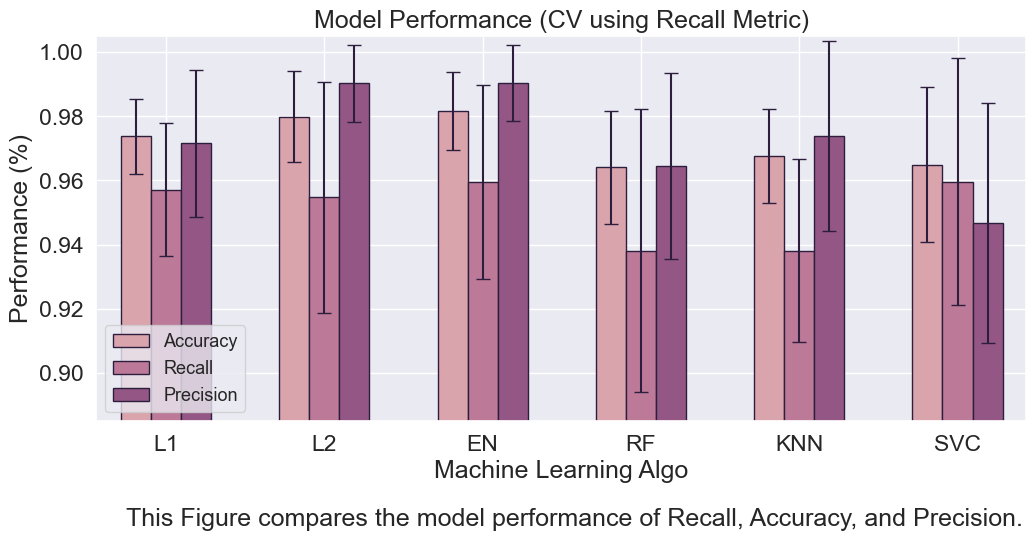

In [271]:
# Model Performance Plot using Cross Validation using RECALL

# Bar width
barWidth = 0.19

# The x position of bars
r1 = np.arange(len(model_avgs_CVrec_acc))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


text_caption = 'This Figure compares the model performance of Recall, Accuracy, and Precision.'

plt.figure(figsize=(12,5)).text(0.15,-.1,text_caption,horizontalalignment = 'left',wrap=True)
sns.set(font_scale=1.5) 
sns.set_style('darkgrid')
plot_1 = plt.bar(r1,model_avgs_CVrec_acc, width = barWidth, color = '#daa4ac', edgecolor = '#2d1e3e', label='Accuracy',yerr=model_stds_CVrec_acc,capsize=5.0,ecolor='#2d1e3e')
plot_2 = plt.bar(r2,model_avgs_CVrec_rec, width = barWidth, color = '#bd7a98', edgecolor = '#2d1e3e', label='Recall',yerr=model_stds_CVrec_rec,capsize=5.0,ecolor='#2d1e3e')
plot_3 = plt.bar(r3,model_avgs_CVrec_pre, width = barWidth, color = '#945785', edgecolor = '#2d1e3e', label='Precision',yerr=model_stds_CVrec_pre,capsize=5.0,ecolor='#2d1e3e')
plt.ylabel('Performance (%)')
plt.xlabel('Machine Learning Algo')
plt.title("Model Performance (CV using Recall Metric)")
plt.legend(fontsize=13)
plt.xticks([r + barWidth for r in range(len(model_names))],model_names)
plt.axis([-0.25,5.625, 0.885, 1.005])
plt.savefig("./../figures/model_performance_CVrec.png",bbox_inches="tight",dpi=400)
plt.show()

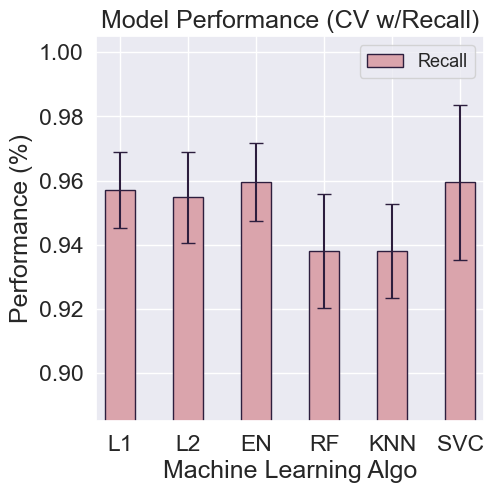

In [64]:
# Model Performance Plot using Cross Validation using RECALL

# Bar width
barWidth = 0.45

# The x position of bars
r1 = np.arange(len(model_avgs_CVrec_acc))

# .text(0.18,-.15,text_caption,horizontalalignment = 'left',wrap=True)
text_caption = 'Sample.'

plt.figure(figsize=(5,5))
sns.set(font_scale=1.5) 
sns.set_style('darkgrid')
plot_1 = plt.bar(r1,model_avgs_CVrec_rec, width = barWidth, color = '#daa4ac', edgecolor = '#2d1e3e', label='Recall',yerr=model_stds_CVrec_acc,capsize=5.0,ecolor='#2d1e3e')
plt.ylabel('Performance (%)')
plt.xlabel('Machine Learning Algo')
plt.title("Model Performance (CV w/Recall)")
plt.legend(fontsize=13)
plt.xticks([r for r in range(len(model_names))],model_names)
plt.axis([-0.35,5.35, 0.885, 1.005])
plt.show()

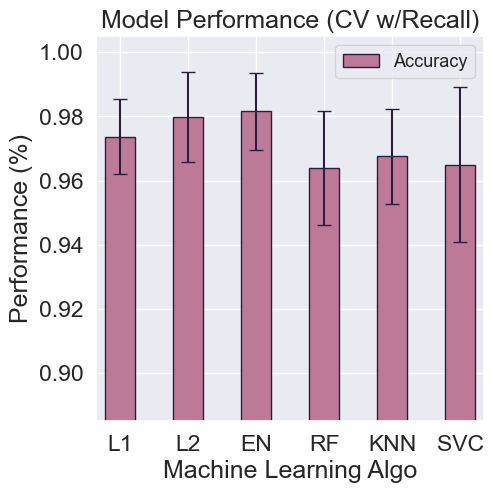

In [61]:
# Model Performance Plot using Cross Validation using RECALL

# Bar width
barWidth = 0.45

# The x position of bars
r1 = np.arange(len(model_avgs_CVrec_acc))

# .text(0.18,-.15,text_caption,horizontalalignment = 'left',wrap=True)
text_caption = 'Sample.'

plt.figure(figsize=(5,5))
sns.set(font_scale=1.5) 
sns.set_style('darkgrid')
plot_1 = plt.bar(r1,model_avgs_CVrec_acc, width = barWidth, color = '#bd7a98', edgecolor = '#2d1e3e', label='Accuracy',yerr=model_stds_CVrec_acc,capsize=5.0,ecolor='#2d1e3e')
plt.ylabel('Performance (%)')
plt.xlabel('Machine Learning Algo')
plt.title("Model Performance (CV w/Recall)")
plt.legend(fontsize=13)
plt.xticks([r for r in range(len(model_names))],model_names)
plt.axis([-0.35,5.35, 0.885, 1.005])
plt.show()

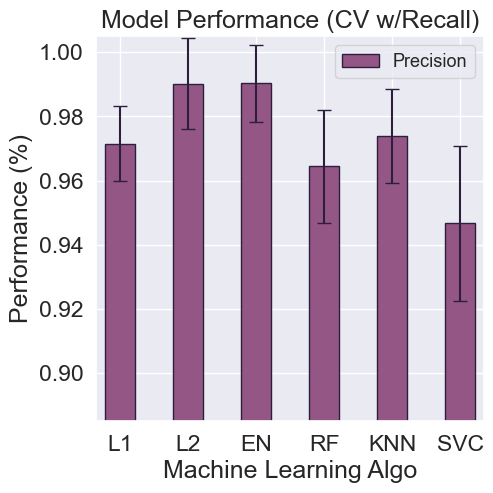

In [62]:
# Model Performance Plot using Cross Validation using RECALL

# Bar width
barWidth = 0.45

# The x position of bars
r1 = np.arange(len(model_avgs_CVrec_acc))

# .text(0.18,-.15,text_caption,horizontalalignment = 'left',wrap=True)
text_caption = 'Sample.'

plt.figure(figsize=(5,5))
sns.set(font_scale=1.5) 
sns.set_style('darkgrid')
plot_1 = plt.bar(r1,model_avgs_CVrec_pre, width = barWidth, color = '#945785', edgecolor = '#2d1e3e', label='Precision',yerr=model_stds_CVrec_acc,capsize=5.0,ecolor='#2d1e3e')
plt.ylabel('Performance (%)')
plt.xlabel('Machine Learning Algo')
plt.title("Model Performance (CV w/Recall)")
plt.legend(fontsize=13)
plt.xticks([r for r in range(len(model_names))],model_names)
plt.axis([-0.35,5.35, 0.885, 1.005])
plt.show()

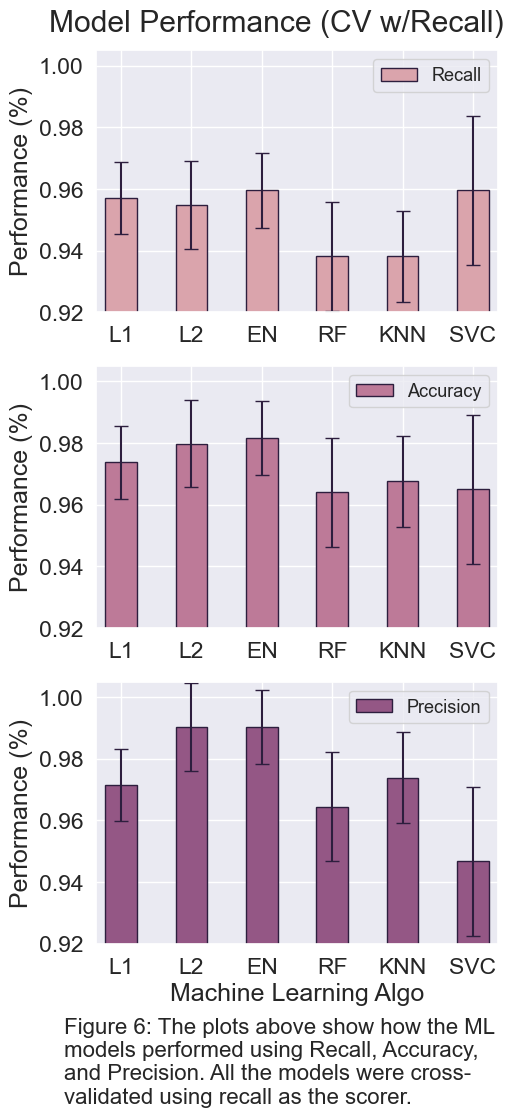

In [369]:
# Plotting overall figure for report.
# Bar width
barWidth = 0.45

text_caption = '\
Figure 6: The plots above show how the ML\n\
models performed using Recall, Accuracy,\n\
and Precision. All the models were cross-\n\
validated using recall as the scorer.'

# The x position of bars
r1 = np.arange(len(model_avgs_CVrec_acc))
fig,axs = plt.subplots(3,1,figsize=(5,10))
fig.text(0.075,-.1105,text_caption,horizontalalignment = 'left',wrap=True,fontsize=16)
fig.suptitle("Model Performance (CV w/Recall)")
fig.tight_layout(pad=0.5)
sns.set(font_scale=1.5) 
sns.set_style('darkgrid')

axs[0].bar(r1,model_avgs_CVrec_rec, width = barWidth, color = '#daa4ac', edgecolor = '#2d1e3e', label='Recall',yerr=model_stds_CVrec_acc,capsize=5.0,ecolor='#2d1e3e')
axs[0].legend(fontsize=13)
axs[0].set(ylabel='Performance (%)')
axs[0].set_xticks([r for r in range(len(model_names))],model_names)
axs[0].axis([-0.35,5.35, 0.92, 1.005])

axs[1].bar(r1,model_avgs_CVrec_acc, width = barWidth, color = '#bd7a98', edgecolor = '#2d1e3e', label='Accuracy',yerr=model_stds_CVrec_acc,capsize=5.0,ecolor='#2d1e3e')
axs[1].legend(fontsize=13)
axs[1].set(ylabel='Performance (%)')
axs[1].set_xticks([r for r in range(len(model_names))],model_names)
axs[1].axis([-0.35,5.35, 0.92, 1.005])

axs[2].bar(r1,model_avgs_CVrec_pre, width = barWidth, color = '#945785', edgecolor = '#2d1e3e', label='Precision',yerr=model_stds_CVrec_acc,capsize=5.0,ecolor='#2d1e3e')
axs[2].legend(fontsize=13)
axs[2].set(xlabel='Machine Learning Algo', ylabel='Performance (%)')
axs[2].set_xticks([r for r in range(len(model_names))],model_names)
axs[2].axis([-0.35,5.35, 0.92, 1.005])

plt.savefig("./../figures/overview_model_performance_CVrec.png",bbox_inches="tight",dpi=400)
plt.show()

In [158]:
# Hex colors for the cube helix palette. 
pal = sns.cubehelix_palette()
pal.as_hex()[3]

'#945785'

In [104]:
# DataFrame used for plotting, seaborn

model_scores_CVacc = [
    L1_CVacc_best_model_scores_acc,L1_CVacc_best_model_scores_rec,L1_CVacc_best_model_scores_pre, # L1 CV with accuracy
    L2_CVacc_best_model_scores_acc,L2_CVacc_best_model_scores_rec,L2_CVacc_best_model_scores_pre, # L2 CV with accuracy
    EN_CVacc_best_model_scores_acc,EN_CVacc_best_model_scores_rec,EN_CVacc_best_model_scores_pre, # Elastic Net CV with accuracy
    RF_CVacc_best_model_scores_acc,RF_CVacc_best_model_scores_rec,RF_CVacc_best_model_scores_pre, # RF CV with accuracy 
    KNN_CVacc_best_model_scores_acc,KNN_CVacc_best_model_scores_rec,KNN_CVacc_best_model_scores_pre, # KNN CV with accuracy
    SVC_CVacc_best_model_scores_acc,SVC_CVacc_best_model_scores_rec,SVC_CVacc_best_model_scores_pre, # SVC CV with accuracy
    ]
model_scores_CVrec = [
L1_CVrec_best_model_scores_acc,L1_CVrec_best_model_scores_rec,L1_CVrec_best_model_scores_pre, # L1 CV with recall
L2_CVrec_best_model_scores_acc,L2_CVrec_best_model_scores_rec,L2_CVrec_best_model_scores_pre, # L2 CV with recall
EN_CVrec_best_model_scores_acc,EN_CVrec_best_model_scores_rec,EN_CVrec_best_model_scores_pre, # Elastic Net CV with recall
RF_CVrec_best_model_scores_acc,RF_CVrec_best_model_scores_rec,RF_CVrec_best_model_scores_pre, # RF CV with recall
KNN_CVrec_best_model_scores_acc,KNN_CVrec_best_model_scores_rec,KNN_CVrec_best_model_scores_pre, # KNN CV with recall
SVC_CVrec_best_model_scores_acc,SVC_CVrec_best_model_scores_rec,SVC_CVrec_best_model_scores_pre  # SVC CV with recall
]

model_names_CVacc = [
    'L1 ACC','L1 REC','L1 PRE', # L1 CV with accuracy
    'L2 ACC','L2 REC','L2 PRE', # L2 CV with accuracy
    'EN ACC','EN REC','EN PRE', # Elastic Net CV with accuracy
    'RF ACC','RF REC','RF PRE', # RF CV with accuracy 
    'KNN ACC','KNN REC','KNN PRE', # KNN CV with accuracy
    'SVC ACC','SVC REC','SVC PRE', # SVC CV with accuracy
    ]

model_names_CVrec = [
    'L1 ACC','L1 REC','L1 PRE', # L1 CV with recall
    'L2 ACC','L2 REC','L2 PRE', # L2 CV with recall
    'EN ACC','EN REC','EN PRE', # Elastic Net CV with recall
    'RF ACC','RF REC','RF PRE', # RF CV with recall
    'KNN ACC','KNN REC','KNN PRE', # KNN CV with recall
    'SVC ACC','SVC REC','SVC PRE'  # SVC CV with recall
]

# Mean and Standard Deviations of Scores that were CV'ed with Accuracy
model_avgs_CVacc = [np.mean(scores) for scores in model_scores_CVacc]
model_stds_CVacc = [np.std(scores) for scores in model_scores_CVacc]

# Mean and Standard Deviations of Scores that were CV'ed with Recall
model_avgs_CVrec = [np.mean(scores) for scores in model_scores_CVrec]
model_stds_CVrec = [np.std(scores) for scores in model_scores_CVrec]

# CV using Accuracy
df = {
    'Model Algo' : np.repeat(['L1','L2','Elastic Net','Random Forest','K Nearest Neighbors','Support Vector Classification'],3),
    'Score Type' : [
        "Accuracy","Recall","Precision",
        "Accuracy","Recall","Precision",
        "Accuracy","Recall","Precision",
        "Accuracy","Recall","Precision",
        "Accuracy","Recall","Precision",
        "Accuracy","Recall","Precision",
        ],
    'Model Performance': model_avgs_CVacc,
    'Model Performance Error' : model_stds_CVacc
    }
df_acc = pd.DataFrame(df)

# CV using Recall
df = {
    'Model Algo' : np.repeat(['L1','L2','Elastic Net','Random Forest','K Nearest Neighbors','Support Vector Classification'],3),
    'Score Type' : [
        "Accuracy","Recall","Precision",
        "Accuracy","Recall","Precision",
        "Accuracy","Recall","Precision",
        "Accuracy","Recall","Precision",
        "Accuracy","Recall","Precision",
        "Accuracy","Recall","Precision",
        ],
    'Model Performance': model_avgs_CVrec,
    'Error' : model_stds_CVrec
    }
df_rec = pd.DataFrame(df)


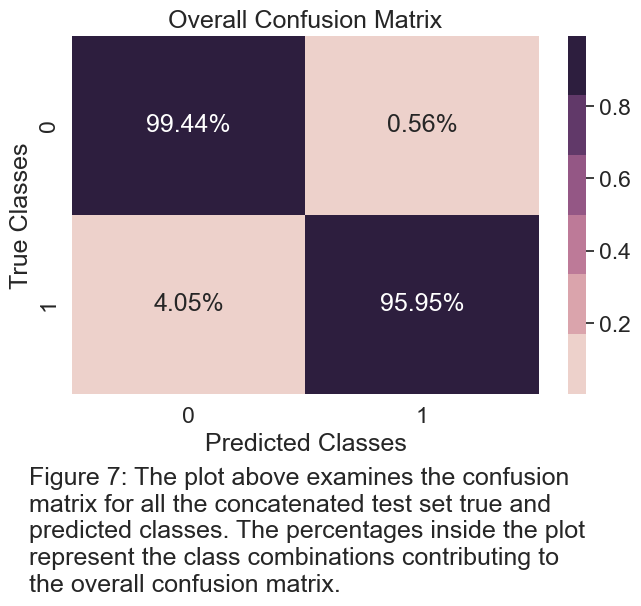

In [373]:
# Construct a confusion matrix for the machine learning models of interest
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Consturcting df for confusion matrix.
df = pd.DataFrame(columns=['True','Predict'])
y_true = pd.DataFrame()
y_pred = pd.DataFrame()
for i in EN_CVrec_y_test_sets:
    temp = pd.DataFrame(i)
    y_true = pd.concat([y_true,temp],ignore_index=True,axis=0)
for i in EN_CVrec_y_pred_sets:
    temp = pd.DataFrame(i)
    y_pred = pd.concat([y_pred,temp],ignore_index=True,axis=0)

df = pd.concat([y_true,y_pred],ignore_index=True,axis=1)
df.columns = ['true','pred']

# Confusion Matrix
c_mat = confusion_matrix(df['true'],df['pred'])
c_norm = c_mat.astype('float') / c_mat.sum(axis=1)[:, np.newaxis]

text_caption = '\
Figure 7: The plot above examines the confusion\n\
matrix for all the concatenated test set true and\n\
predicted classes. The percentages inside the plot\n\
represent the class combinations contributing to\n\
the overall confusion matrix.'

sample_cmap = sns.cubehelix_palette(reverse=False)

plt.figure(figsize=(7,5)).text(0.065,-0.21,text_caption,horizontalalignment = 'left',wrap=True)
sns.set(font_scale=1.5) 
sns.heatmap(c_norm, annot=True,fmt='.2%', cmap=sample_cmap)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title("Overall Confusion Matrix")
plt.tight_layout()
plt.savefig("./../figures/overall_confusion_matrix.png",bbox_inches="tight",dpi=400)
plt.show()

In [245]:
# Baseline Metrics: Recall, Accuracy, and Precision
import numpy as np

# y_pred_baseline = np.repeat('B',df.shape[0])
# y_pred_baseline = pd.Series(y_pred_baseline) # sanity check
# df = df.replace(0,'B')
# df = df.replace(1,'M')

# df = pd.concat([df,y_pred_baseline],axis=1,ignore_index=True)
# df.columns = ['true','pred','baseline']

rec_baseline = recall_score(df['true'],df['baseline'],pos_label='M')
acc_baseline = accuracy_score(df['true'],df['baseline'])
pre_baseline = precision_score(df['true'],df['baseline'],pos_label='M')

print('Baseline Scores:')
print('----------------')
print('Recall:',rec_baseline)
print('Accuracy:',"{:.3f}".format(acc_baseline))
print('Precision:',pre_baseline)

Baseline Scores:
----------------
Recall: 0.0
Accuracy: 0.632
Precision: 0.0


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


(114, 30)
(114, 30)


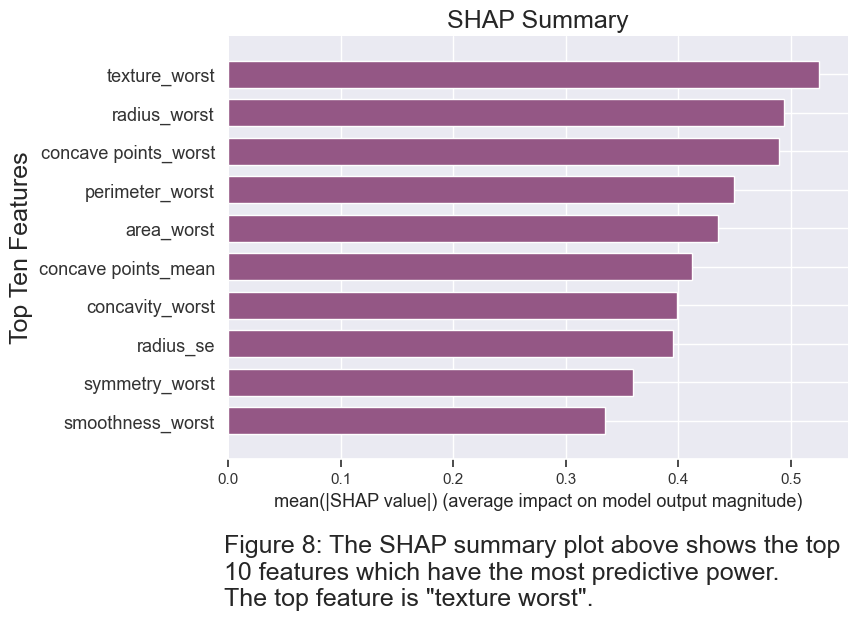

In [372]:
# Global Feature Importances
import shap
import numpy as np

ftr_names = X.columns.tolist() # Column names
idx = np.argmax(EN_CVrec_best_model_scores_rec) # best performing model

text_caption = '\
Figure 8: The SHAP summary plot above shows the top\n\
10 features which have the most predictive power.\n\
The top feature is "texture worst".'

plt.figure().text(0.12,-0.15,text_caption,horizontalalignment = 'left',wrap=True)
shap.initjs() # 
X_other_transformed = EN_CVrec_best_models[idx].best_estimator_[0].transform(EN_CVrec_X_other_sets[idx])
explainer = shap.Explainer(EN_CVrec_best_models[idx].best_estimator_[1], X_other_transformed, feature_names=ftr_names)
X_test_transformed = EN_CVrec_best_models[idx].best_estimator_[0].transform(EN_CVrec_X_test_sets[idx])
print(np.shape(X_test_transformed))
shap_values = explainer(X_test_transformed)
print(np.shape(shap_values))
shap.summary_plot(shap_values, EN_CVrec_X_test_sets[idx],feature_names=ftr_names,plot_type='bar',max_display=10,color='#945785',show=False)
f  = plt.gcf()
plt.title('SHAP Summary')
plt.ylabel('Top Ten Features')
plt.savefig("./../figures/shap_summary_plot.png",bbox_inches="tight",dpi=400)
plt.show()


In [247]:
from sklearn.inspection import permutation_importance
result = permutation_importance(EN_CVrec_best_models[idx].best_estimator_[1],X_test_transformed,y_test,n_repeats=10,scoring='recall',n_jobs=6,random_state=22)

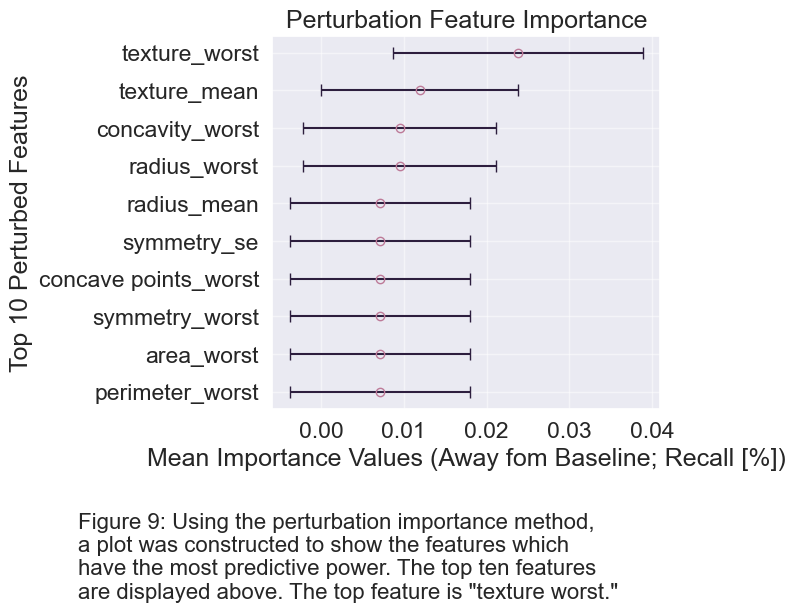

In [389]:
# Pertubation Feature Importance
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

# Best Model idx and feature names
ftr_names = X.columns.tolist() # Column names
idx = np.argmax(EN_CVrec_best_model_scores_rec) # best performing model

# Test set prediction score. 
X_test_transformed = EN_CVrec_best_models[idx].best_estimator_[0].transform(EN_CVrec_X_test_sets[idx])
y_test_pred = EN_CVrec_best_models[idx].best_estimator_[1].predict(X_test_transformed)
y_test = EN_CVrec_y_test_sets[idx]
X_test_score = recall_score(y_test,y_test_pred)

# Organizing permutation importance results.
import_ftr_mean_sorted = result.importances_mean.argsort()[-10::]
import_ftr_std_sorted = result.importances_std.argsort()
std_deviation = pd.Series(data=result.importances_std[import_ftr_mean_sorted])

feature_names = EN_CVrec_best_models[idx].best_estimator_[0].get_feature_names_out()

# Edit feature names to look cleaner
feature_names = ['perimeter_worst', 'area_worst', 'symmetry_worst',
       'concave points_worst', 'symmetry_se',
       'radius_mean', 'radius_worst', 'concavity_worst',
       'texture_mean', 'texture_worst']

text_caption = '\
Figure 9: Using the perturbation importance method,\n\
a plot was constructed to show the features which\n\
have the most predictive power. The top ten features\n\
are displayed above. The top feature is "texture worst."'

# Plot.
plt.figure(figsize=(7,5)).text(0.125,-0.21,text_caption,horizontalalignment = 'left',wrap=True,fontsize=16)
plt.grid(alpha=0.5)
plt.errorbar(
       result.importances_mean[import_ftr_mean_sorted],
       feature_names,xerr=std_deviation,marker='o',
       linestyle='None',markerfacecolor='None',
       markeredgecolor='#bd7a98',capsize=4.5,ecolor='#2d1e3e')
plt.title("Perturbation Feature Importance")
plt.ylabel("Top 10 Perturbed Features")
plt.xlabel("Mean Importance Values (Away fom Baseline; Recall [%])")
plt.savefig("./../figures/perturbation_importance_plot.png",bbox_inches="tight",dpi=400)
plt.tight_layout()

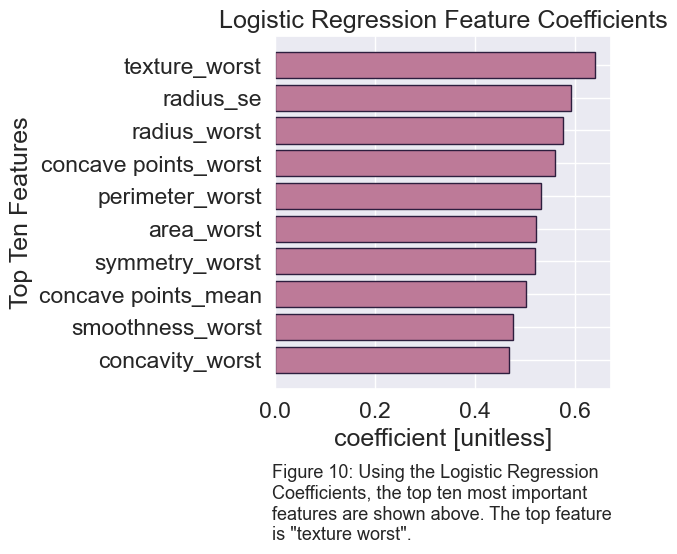

In [382]:

feature_names = EN_CVrec_best_models[idx].best_estimator_[0].get_feature_names_out()

# Edit feature names to look cleaner
feature_names = [
    'concavity_worst', 'smoothness_worst', 'concave points_mean',
    'symmetry_worst', 'area_worst', 'perimeter_worst',
    'concave points_worst', 'radius_worst', 'radius_se',
    'texture_worst'
    ]

coefs = EN_CVrec_best_models[idx].best_estimator_[-1].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

text_caption = '\
Figure 10: Using the Logistic Regression\n\
Coefficients, the top ten most important\n\
features are shown above. The top feature\n\
is "texture worst".'

plt.figure().text(0.44,-0.14,text_caption,horizontalalignment = 'left',wrap=True)
plt.rcParams.update({'font.size': 13})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]],color='#bd7a98',edgecolor = '#2d1e3e')
plt.yticks(np.arange(10),feature_names)
plt.xlabel('coefficient [unitless]')
plt.ylabel('Top Ten Features')
plt.title('Logistic Regression Feature Coefficients')
plt.tight_layout()
plt.savefig("./../figures/log_reg_coefficients_plot.png",bbox_inches="tight",dpi=400)
plt.show()

In [366]:
# Local Feature Importance #1
ind = 1 # the index of the point to explain
print(explainer.expected_value)
shap.initjs()
shap.plots.force(shap_values[ind],matplotlib=False,plot_cmap=['#daa4ac','#945785'])

1.447475985208084


In [261]:
# Local Feature Importance #2
ind = 2 # the index of the point to explain
print(explainer.expected_value)
shap.initjs() 
shap.plots.force(shap_values[ind],matplotlib=False,plot_cmap=['#daa4ac','#945785'])

1.447475985208084
